In [78]:
# !pip install fastai

In [79]:
# pip install statsmodels

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress

In [81]:
#from google.colab import drive
#drive.mount('/content/drive')

In [82]:
#input=pd.read_csv('/content/drive/MyDrive/DataSets/Medical Student Mental Health.csv')
input = pd.read_csv(r'C:\Users\User\Downloads\Medical Student Mental Health.csv')


In [83]:
input.head()

id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   
3  10   21     2    2      1     0    1      51       5     0   101        52   
4  13   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23

In [84]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         886 non-null    int64  
 1   age        886 non-null    int64  
 2   year       886 non-null    int64  
 3   sex        886 non-null    int64  
 4   glang      886 non-null    int64  
 5   part       886 non-null    int64  
 6   job        886 non-null    int64  
 7   stud_h     886 non-null    int64  
 8   health     886 non-null    int64  
 9   psyt       886 non-null    int64  
 10  jspe       886 non-null    int64  
 11  qcae_cog   886 non-null    int64  
 12  qcae_aff   886 non-null    int64  
 13  amsp       886 non-null    int64  
 14  erec_mean  886 non-null    float64
 15  cesd       886 non-null    int64  
 16  stai_t     886 non-null    int64  
 17  mbi_ex     886 non-null    int64  
 18  mbi_cy     886 non-null    int64  
 19  mbi_ea     886 non-null    int64  
dtypes: float64

In [85]:
# Get the last 5 column names
last_10_columns = input.columns[-10:]

# New names for the last 5 columns
new_names = ["total_empathy","cognitive_empathy","affective_empathy","modify_presentation","emotion_recognition","depression", "anxiety", "exhaustion", "cynicism", "efficacy"]

# Create a dictionary for renaming
rename_dict = {old: new for old, new in zip(last_10_columns, new_names)}

# Rename the last 5 columns in-place
input.rename(columns=rename_dict, inplace=True)

In [86]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   886 non-null    int64  
 1   age                  886 non-null    int64  
 2   year                 886 non-null    int64  
 3   sex                  886 non-null    int64  
 4   glang                886 non-null    int64  
 5   part                 886 non-null    int64  
 6   job                  886 non-null    int64  
 7   stud_h               886 non-null    int64  
 8   health               886 non-null    int64  
 9   psyt                 886 non-null    int64  
 10  total_empathy        886 non-null    int64  
 11  cognitive_empathy    886 non-null    int64  
 12  affective_empathy    886 non-null    int64  
 13  modify_presentation  886 non-null    int64  
 14  emotion_recognition  886 non-null    float64
 15  depression           886 non-null    int

In [87]:
input.describe()

id         age        year         sex       glang  \
count   886.000000  886.000000  886.000000  886.000000  886.000000   
mean    889.709932   22.383747    3.102709    1.695260   14.327314   
std     515.555875    3.300664    1.763937    0.472665   32.366389   
min       2.000000   17.000000    1.000000    1.000000    1.000000   
25%     447.500000   20.000000    1.000000    1.000000    1.000000   
50%     876.000000   22.000000    3.000000    2.000000    1.000000   
75%    1341.750000   24.000000    5.000000    2.000000    1.000000   
max    1790.000000   49.000000    6.000000    3.000000  121.000000   

             part         job      stud_h      health        psyt  \
count  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.563205    0.348758   25.288939    3.777652    0.224605   
std      0.496269    0.476847   15.927875    1.061497    0.417558   
min      0.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000    0.000000   12.000000    3.000000    0.000000   
50%      1.000000    0.000000   25.000000    4.000000    0.000000   
75%      1.000000    1.000000   36.000000    5.000000    0.000000   
max      1.000000    1.000000   70.000000    5.000000    1.000000   

       total_empathy  cognitive_empathy  affective_empathy  \
count     886.000000         886.000000         886.000000   
mean      106.374718          58.525959          34.784424   
std         8.784012           6.570341           5.377062   
min        67.000000          37.000000          18.000000   
25%       101.000000          54.000000          31.000000   
50%       107.000000          58.000000          35.000000   
75%       113.000000          63.000000          39.000000   
max       125.000000          76.000000          48.000000   

       modify_presentation  emotion_recognition  depression     anxiety  \
count           886.000000           886.000000  886.000000  886.000000   
mean             23.150113             0.720144   18.050790   42.898420   
std               4.993220             0.093570   11.478731   11.978458   
min               6.000000             0.357143    0.000000   20.000000   
25%              20.000000             0.666667    9.000000   34.000000   
50%              23.000000             0.726190   16.000000   43.000000   
75%              26.750000             0.785714   25.000000   51.000000   
max              35.000000             0.952381   56.000000   77.000000   

       exhaustion    cynicism    efficacy  
count  886.000000  886.000000  886.000000  
mean    16.878104   10.079007   24.207675  
std      5.256025    4.592609    4.633675  
min      5.000000    4.000000   10.000000  
25%     13.000000    6.000000   21.000000  
50%     17.000000    9.000000   24.000000  
75%     20.000000   13.000000   28.000000  
max     30.000000   24.000000   36.000000

In [88]:
col=['age','sex','year','part','job','psyt','health','glang']

for var in col:
  value_counts = input[var].value_counts()
  # Calculate the percentage of each value
  percentage_counts = value_counts / len(input) * 100
  print("Percentage of each unique value in " +var+ " column:")
  print(percentage_counts)

Percentage of each unique value in age column:
age
23    15.237020
21    14.108352
22    12.076749
24    12.076749
19    11.399549
20    10.722348
25     7.449210
18     6.433409
26     3.611738
27     1.354402
28     1.241535
29     1.128668
32     0.790068
35     0.338600
37     0.338600
31     0.338600
30     0.225734
17     0.225734
33     0.225734
34     0.225734
49     0.112867
44     0.112867
39     0.112867
38     0.112867
Name: count, dtype: float64
Percentage of each unique value in sex column:
sex
2    68.397291
1    31.038375
3     0.564334
Name: count, dtype: float64
Percentage of each unique value in year column:
year
1    27.652370
3    16.139955
2    15.237020
5    14.334086
4    13.882619
6    12.753950
Name: count, dtype: float64
Percentage of each unique value in part column:
part
1    56.320542
0    43.679458
Name: count, dtype: float64
Percentage of each unique value in job column:
job
0    65.124153
1    34.875847
Name: count, dtype: float64
Percentage of each uni

In [89]:
#plt.rcParams['text.usetex'] = False

In [90]:
#!apt-get install texlive-full

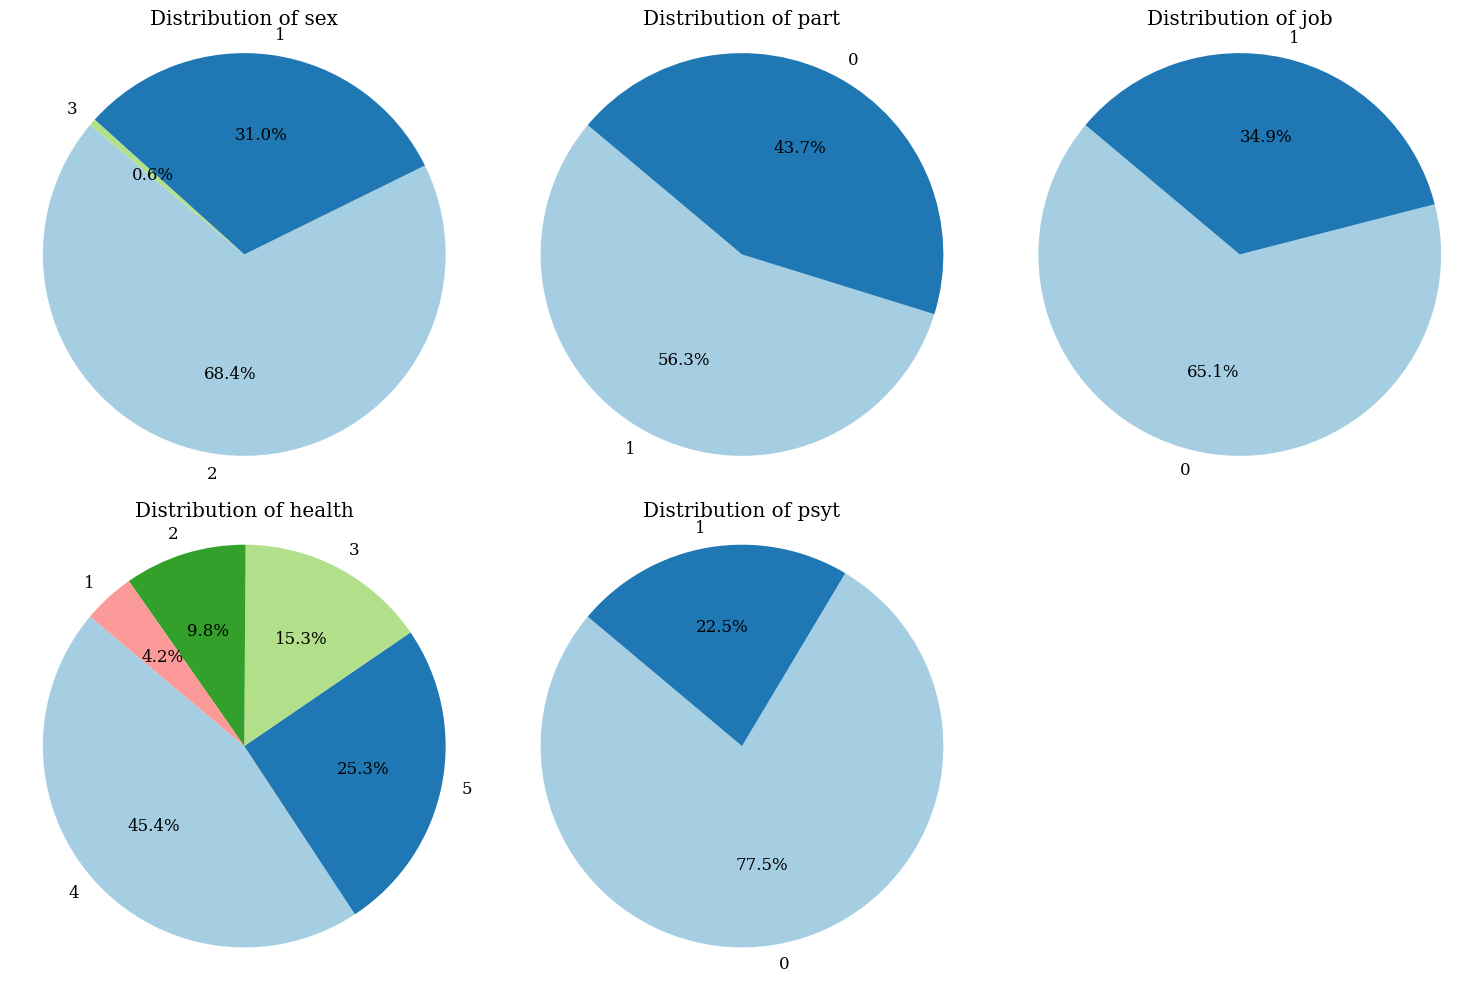

In [91]:
# Function to create pie charts
def create_pie_chart(ax, column_name, data):
    counts = data[column_name].value_counts()
    labels = counts.index
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    ax.set_title(f'Distribution of {column_name}')
    ax.axis('equal')

#
columns=['sex','part','job','health','psyt']
# Number of columns for the subplot grid
num_columns = 3
num_plots = len(columns)

# Calculate number of rows needed
num_rows = (num_plots + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten axes array if there's more than one row
if num_rows > 1:
    axes = axes.flatten()

# Create pie charts for each categorical variable
for i, column in enumerate(columns):
    create_pie_chart(axes[i], column, input)

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Table 1. Descriptive statistics of the final sample (N = 886)

| Sociodemographics       | M (SD)          | Percent |
|-------------------------|-----------------|---------|
| **Gender**              |                 |         |
| Female                  |                 | 68.40   |
| Male                    |                 | 31.04   |
| Non-binary              |                 | 0.56    |
| **Age**                 | 22.38 (3.30)    |         |
| **Curriculum year**     |                 |         |
| B1                      |                 | 27.65   |
| B2                      |                 | 15.24   |
| B3                      |                 | 16.14   |
| M1                      |                 | 13.88   |
| M2                      |                 | 14.33   |
| M3                      |                 | 12.75   |
| **Mother tongue**       |                 |         |
| French                  |                 | 80.93   |
| Italian                 |                 | 5.08    |
| German                  |                 | 3.50    |
| Portuguese              |                 | 3.05    |
| English                 |                 | 2.48    |
| Spanish                 |                 | 2.03    |
| Othera                  |                 | 2.92    |
| **Having a partner**    |                 | 56.32   |
| **Having a paid job**   |                 | 34.88   |
| **Hours of study/weekc**| 25.29 (15.93)   |         |
| **Satisfaction with healthb** | 3.78 (1.06) |         |
| **Consulted a psy last year** |          | 22.46   |

In [92]:
# Check the unique values in each column
for column in input.columns:
    unique_values = sorted(input[column].unique())
    print(f"Column '{column}' has {len(unique_values)} unique values: {unique_values}")

Column 'id' has 886 unique values: [2, 4, 9, 10, 13, 14, 17, 21, 23, 24, 28, 34, 35, 36, 38, 40, 42, 45, 48, 50, 51, 53, 55, 57, 58, 61, 62, 63, 64, 65, 67, 68, 69, 71, 74, 76, 77, 78, 80, 83, 85, 86, 87, 88, 90, 91, 94, 95, 96, 101, 102, 104, 108, 110, 115, 117, 118, 120, 122, 123, 126, 130, 131, 132, 134, 139, 140, 141, 142, 146, 147, 148, 150, 151, 152, 153, 155, 158, 159, 161, 163, 168, 171, 174, 175, 176, 179, 181, 182, 183, 184, 186, 188, 192, 193, 194, 198, 199, 200, 202, 203, 204, 208, 212, 214, 216, 219, 220, 221, 223, 224, 225, 226, 227, 229, 232, 234, 235, 236, 239, 240, 244, 246, 248, 250, 253, 255, 262, 263, 265, 266, 269, 270, 271, 272, 273, 275, 276, 277, 279, 281, 283, 284, 286, 287, 289, 290, 291, 294, 295, 296, 298, 300, 304, 307, 309, 312, 315, 317, 318, 319, 323, 324, 334, 336, 338, 340, 341, 343, 345, 349, 350, 351, 352, 353, 355, 357, 360, 364, 365, 366, 367, 373, 375, 376, 379, 380, 381, 382, 383, 386, 389, 392, 393, 394, 395, 397, 399, 409, 411, 412, 413, 414, 4

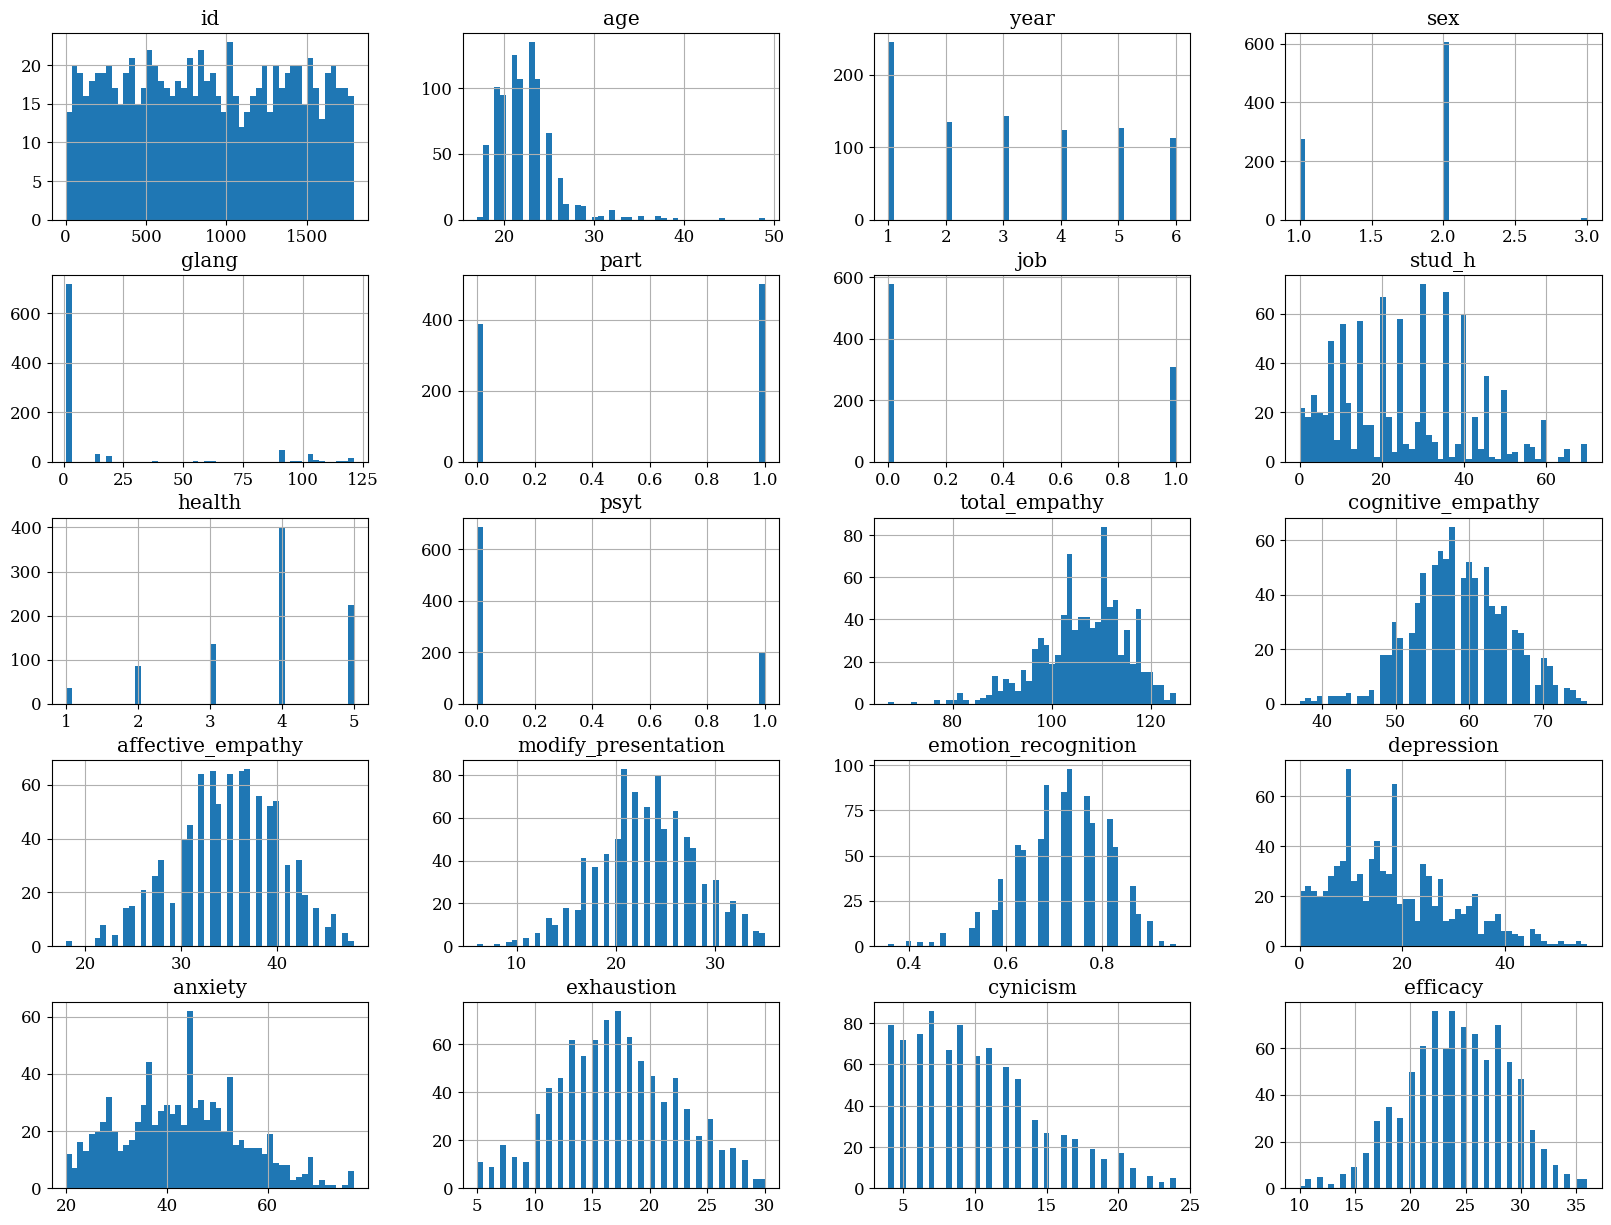

In [93]:
input.hist(bins=50, figsize=(20,15))
plt.show()

In [94]:
# for stat analysis , using whole set ( as we won't predict anything)
from sklearn.model_selection import train_test_split
train_set, test_set = input,input

In [95]:
train_set_copy= train_set.copy()

<Axes: xlabel='sex', ylabel='depression'>

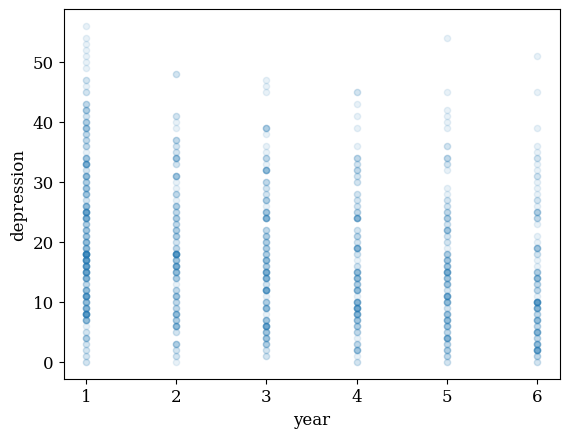

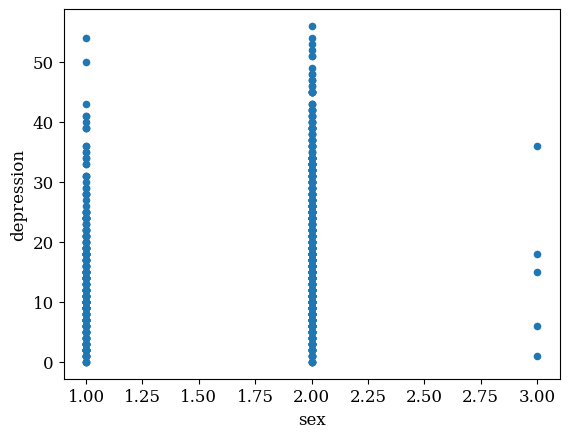

In [96]:
train_set_copy.plot(kind="scatter",x="year",y="depression", alpha=0.1)
train_set_copy.plot(kind="scatter",x="sex",y="depression")

# **Correlation Study**

In [97]:
corr_matrix = train_set_copy.corr()
display(corr_matrix)

id       age      year       sex     glang  \
id                   1.000000 -0.015575 -0.017308  0.009421 -0.022209   
age                 -0.015575  1.000000  0.592530 -0.072708  0.030363   
year                -0.017308  0.592530  1.000000 -0.057285 -0.101388   
sex                  0.009421 -0.072708 -0.057285  1.000000  0.005641   
glang               -0.022209  0.030363 -0.101388  0.005641  1.000000   
part                 0.020932  0.187294  0.146825  0.000315 -0.049970   
job                 -0.013165  0.226448  0.216636  0.020879 -0.050746   
stud_h               0.008610 -0.293557 -0.521473 -0.013806  0.063462   
health               0.002591 -0.029800  0.084023 -0.087907 -0.013567   
psyt                -0.034088  0.015278  0.000861  0.158262 -0.042818   
total_empathy       -0.043873  0.223221  0.301176  0.125781 -0.094676   
cognitive_empathy    0.036164  0.059355  0.076645  0.115706 -0.071495   
affective_empathy   -0.025341 -0.008130  0.061427  0.358691 -0.088361   
modify_presentation  0.014348  0.000477 -0.013683 -0.129970 -0.044275   
emotion_recognition -0.003440 -0.018699  0.080132  0.210735 -0.098981   
depression           0.025713 -0.139106 -0.242121  0.228820  0.098076   
anxiety             -0.016218 -0.081893 -0.164591  0.250579  0.091851   
exhaustion          -0.020312 -0.182733 -0.244105  0.155591  0.038015   
cynicism            -0.014694 -0.001853  0.077246  0.018912  0.036921   
efficacy             0.027984  0.046130 -0.010216 -0.043815 -0.001697   

                         part       job    stud_h    health      psyt  \
id                   0.020932 -0.013165  0.008610  0.002591 -0.034088   
age                  0.187294  0.226448 -0.293557 -0.029800  0.015278   
year                 0.146825  0.216636 -0.521473  0.084023  0.000861   
sex                  0.000315  0.020879 -0.013806 -0.087907  0.158262   
glang               -0.049970 -0.050746  0.063462 -0.013567 -0.042818   
part                 1.000000  0.047603 -0.103950  0.077115  0.026840   
job                  0.047603  1.000000 -0.202371 -0.022981  0.060138   
stud_h              -0.103950 -0.202371  1.000000 -0.073520 -0.033045   
health               0.077115 -0.022981 -0.073520  1.000000 -0.137032   
psyt                 0.026840  0.060138 -0.033045 -0.137032  1.000000   
total_empathy        0.122091  0.077749 -0.134662 -0.003536  0.048500   
cognitive_empathy    0.040388  0.024697 -0.023048 -0.026957  0.046266   
affective_empathy    0.009981 -0.000171 -0.032268 -0.063244  0.123249   
modify_presentation  0.061602  0.028291 -0.001583  0.027197 -0.072552   
emotion_recognition  0.030255  0.015056 -0.056122  0.024235  0.003468   
depression          -0.106189 -0.059803  0.174085 -0.358049  0.268491   
anxiety             -0.072290 -0.063029  0.152052 -0.305345  0.293282   
exhaustion          -0.012205 -0.065522  0.185804 -0.285564  0.177242   
cynicism            -0.018554  0.009590 -0.087386 -0.188539  0.145702   
efficacy             0.047845 -0.018498  0.101732  0.224193 -0.162544   

                     total_empathy  cognitive_empathy  affective_empathy  \
id                       -0.043873           0.036164          -0.025341   
age                       0.223221           0.059355          -0.008130   
year                      0.301176           0.076645           0.061427   
sex                       0.125781           0.115706           0.358691   
glang                    -0.094676          -0.071495          -0.088361   
part                      0.122091           0.040388           0.009981   
job                       0.077749           0.024697          -0.000171   
stud_h                   -0.134662          -0.023048          -0.032268   
health                   -0.003536          -0.026957          -0.063244   
psyt                      0.048500           0.046266           0.123249   
total_empathy             1.000000           0.342668           0.263384   
cognitive_empathy         0.342668           1.

In [98]:
last_10_columns = train_set_copy.iloc[:, -10:]
corr_matrix_last_10 = last_10_columns.corr()
display(corr_matrix_last_10)

total_empathy  cognitive_empathy  affective_empathy  \
total_empathy             1.000000           0.342668           0.263384   
cognitive_empathy         0.342668           1.000000           0.258696   
affective_empathy         0.263384           0.258696           1.000000   
modify_presentation       0.099395           0.386682          -0.071391   
emotion_recognition       0.097062           0.073708           0.141379   
depression               -0.080058          -0.034244           0.250947   
anxiety                  -0.075036          -0.077868           0.331350   
exhaustion               -0.040542          -0.023630           0.215886   
cynicism                 -0.006981          -0.024820           0.128488   
efficacy                  0.082508           0.184096          -0.113891   

                     modify_presentation  emotion_recognition  depression  \
total_empathy                   0.099395             0.097062   -0.080058   
cognitive_empathy               0.386682             0.073708   -0.034244   
affective_empathy              -0.071391             0.141379    0.250947   
modify_presentation             1.000000             0.002780   -0.152052   
emotion_recognition             0.002780             1.000000    0.029881   
depression                     -0.152052             0.029881    1.000000   
anxiety                        -0.249231             0.037688    0.715728   
exhaustion                     -0.073011             0.015348    0.605617   
cynicism                       -0.029343             0.061965    0.407727   
efficacy                        0.220616            -0.034889   -0.453589   

                      anxiety  exhaustion  cynicism  efficacy  
total_empathy       -0.075036   -0.040542 -0.006981  0.082508  
cognitive_empathy   -0.077868   -0.023630 -0.024820  0.184096  
affective_empathy    0.331350    0.215886  0.128488 -0.113891  
modify_presentation -0.249231   -0.073011 -0.029343  0.220616  
emotion_recognition  0.037688    0.015348  0.061965 -0.034889  
depression           0.715728    0.605617  0.407727 -0.453589  
anxiety              1.000000    0.530486  0.331884 -0.462535  
exhaustion           0.530486    1.000000  0.505200 -0.480821  
cynicism             0.331884    0.505200  1.000000 -0.565939  
efficacy            -0.462535   -0.480821 -0.565939  1.000000

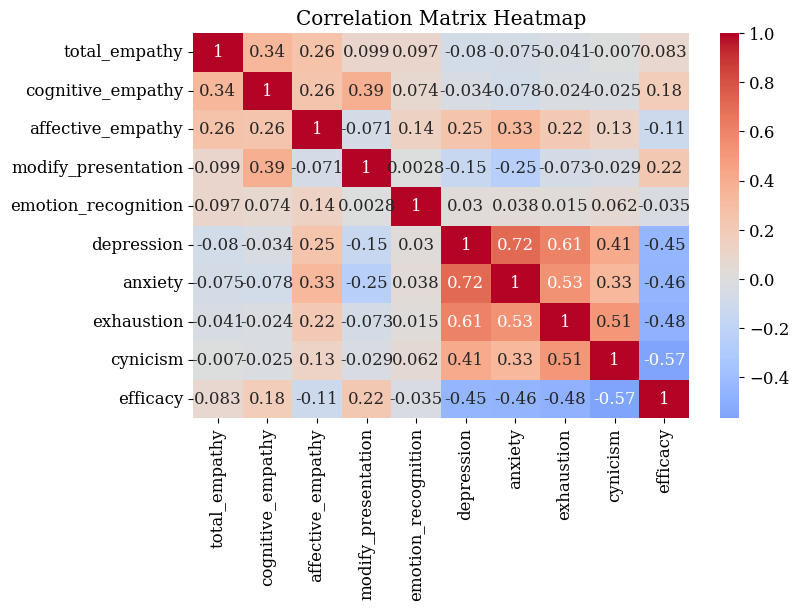

In [99]:
plt.figure(figsize=(8, 5))  # Set the size of the plot
sns.heatmap(corr_matrix_last_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Model Training**

In [100]:
!pip install mord


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from mord import LogisticIT
import numpy as np

# Load the data
data = input

# Select features and target
features = ['age', 'year', 'sex', 'total_empathy', 'cognitive_empathy', 'affective_empathy',
            'emotion_recognition', 'depression', 'anxiety', 'exhaustion', 'cynicism', 'efficacy',
            'stud_h', 'job', 'part']
target = 'health'

X = data[features]
y = data[target]

# Preprocess the data
# Encode categorical variables
X = pd.get_dummies(X, columns=['sex', 'job', 'part'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticIT()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.48314606741573035
Confusion Matrix:
[[ 2  0  0  2  2]
 [ 3  0  0 19  0]
 [ 2  0  0 21  0]
 [ 1  0  0 78  3]
 [ 2  0  0 37  6]]


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

data=input

# Assuming `data` is your DataFrame and `health` is your target variable
X = data.drop('health', axis=1)  # Features
y = data['health']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


[[  0   1   2   1   5]
 [  0   7  10  17   0]
 [  0   3   2  27   2]
 [  0   6   3 100  20]
 [  0   0   3  35  22]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.41      0.21      0.27        34
           3       0.10      0.06      0.07        34
           4       0.56      0.78      0.65       129
           5       0.45      0.37      0.40        60

    accuracy                           0.49       266
   macro avg       0.30      0.28      0.28       266
weighted avg       0.44      0.49      0.45       266



C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[ 0  3  0  0  6]
 [ 0  1 11 20  2]
 [ 0  1  2 29  2]
 [ 0  5  8 90 26]
 [ 0  0  0 45 15]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.10      0.03      0.05        34
           3       0.10      0.06      0.07        34
           4       0.49      0.70      0.58       129
           5       0.29      0.25      0.27        60

    accuracy                           0.41       266
   macro avg       0.20      0.21      0.19       266
weighted avg       0.33      0.41      0.35       266



C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

# **Relation of mental distress and academic efficacy**

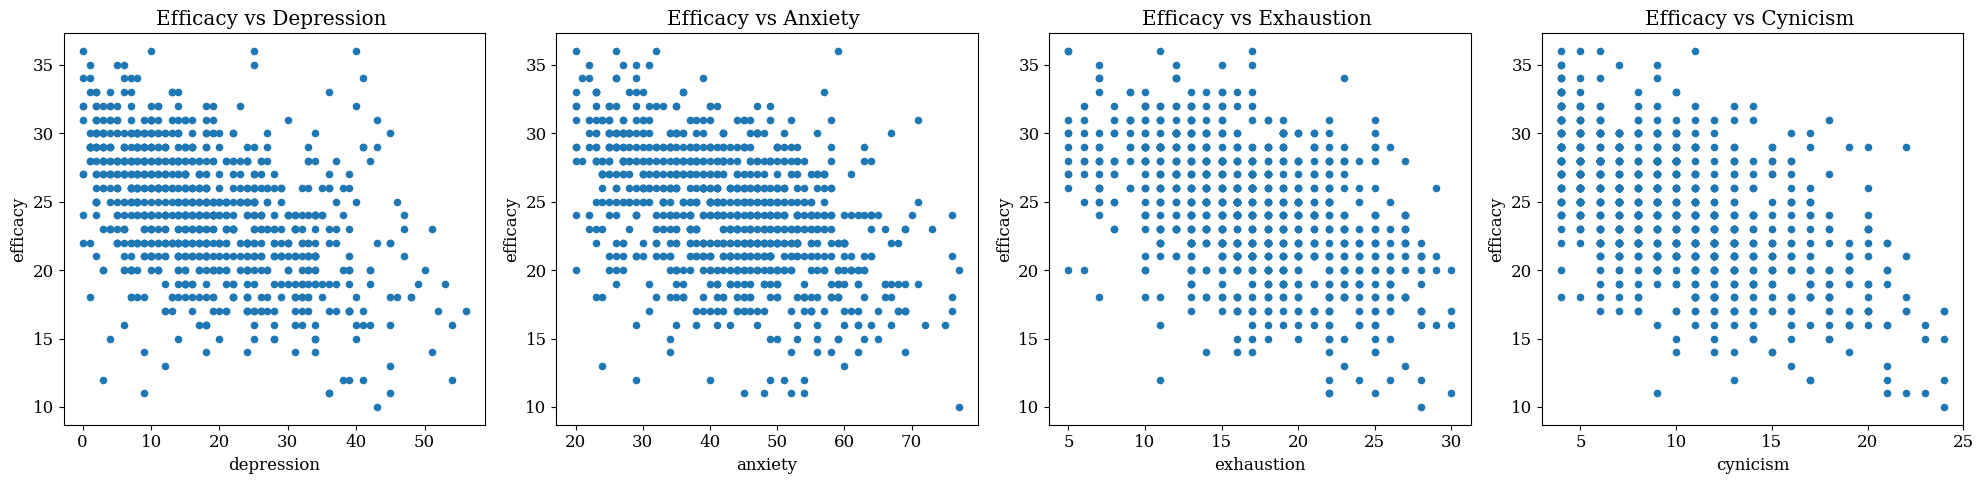

In [104]:
target_columns = ['depression', 'anxiety', 'exhaustion', 'cynicism']

# Create a figure and subplots
fig, axs = plt.subplots(1, len(target_columns), figsize=(20, 5))

# Loop through the target columns and create scatter plots
for ax, column in zip(axs, target_columns):
    train_set_copy.plot(kind="scatter", x=column, y="efficacy", ax=ax)
    ax.set_title(f'Efficacy vs {column.capitalize()} ')

# Adjust layout
plt.tight_layout()
plt.show()

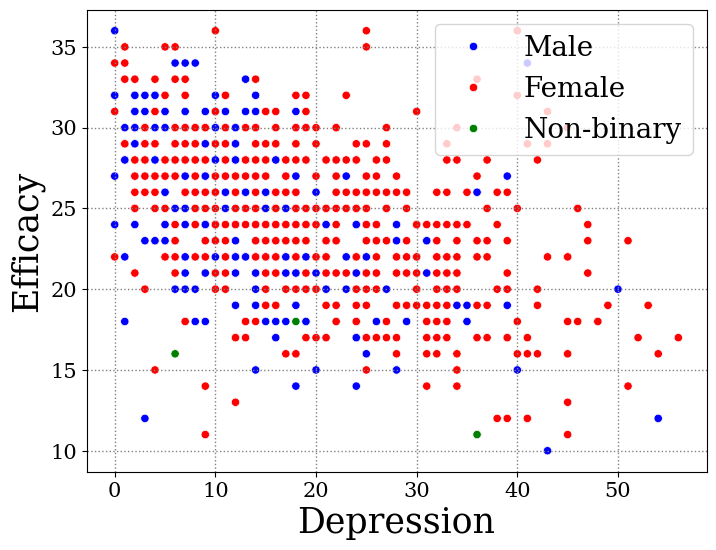

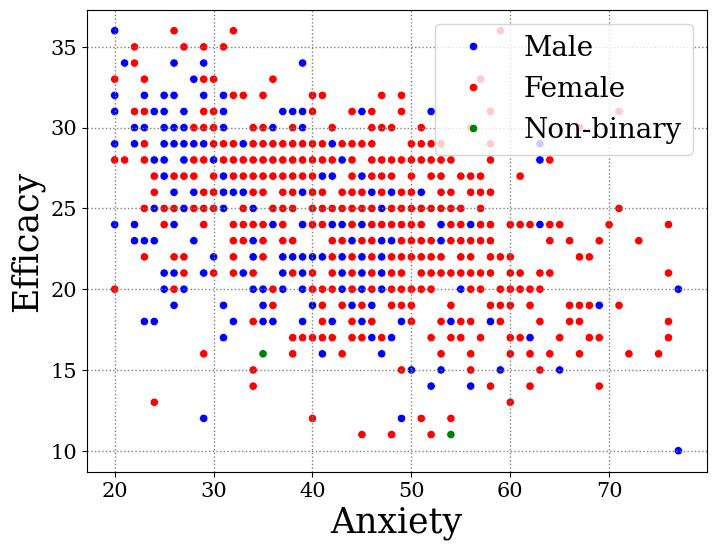

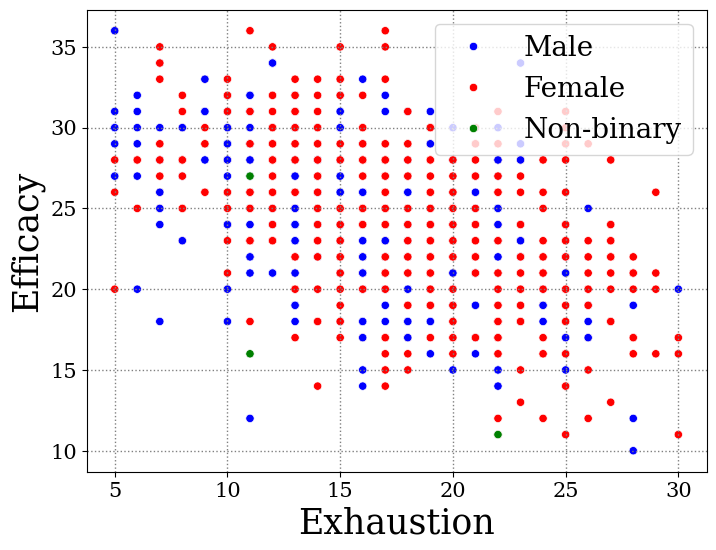

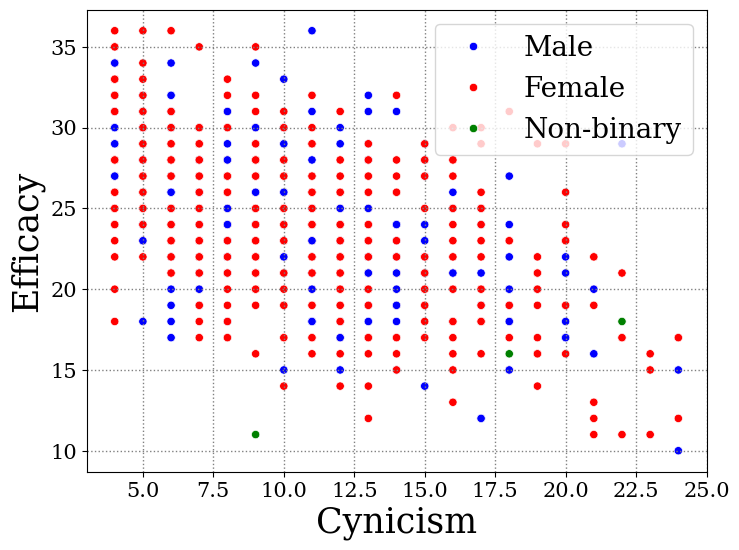

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font for the plots
plt.style.use('default')  # Reset style to default
plt.rc('font', family='serif', size=15)

target_columns = ['depression', 'anxiety', 'exhaustion', 'cynicism']

# Map numeric values to gender labels
gender_labels = {1: 'Male', 2: 'Female', 3: 'Non-binary'}

# Loop through each target column and create a separate scatter plot image
for column in target_columns:
    # Create a new figure for each plot
    plt.figure(figsize=(8, 6))  # Adjust the figsize as needed

    # Create scatter plot
    sns.scatterplot(
        x=column,
        y="efficacy",
        hue="sex",
        palette={'Male': 'blue', 'Female': 'red', 'Non-binary': 'green'},
        data=train_set_copy.replace({'sex': gender_labels})  # Replace numeric values with labels
    )

    # Set the title for the plot
    #plt.title(f'Efficacy vs {column.capitalize()}')

    # Set the x-axis and y-axis labels with capitalized first letters
    plt.xlabel(column.capitalize(), fontfamily='serif', fontsize=25)
    plt.ylabel('Efficacy', fontfamily='serif', fontsize=25)

     # Add a grid with light dotted lines
    plt.grid(True, linestyle=':', linewidth=1, color='grey')

    # Add the legend
    plt.legend(fontsize=20, loc='upper right')

    # Save the plot as a separate image file
    plt.savefig(f'content/Efficacy_vs_{column.capitalize()}.pdf', dpi=600, bbox_inches='tight')

    # Show the plot
    plt.show()


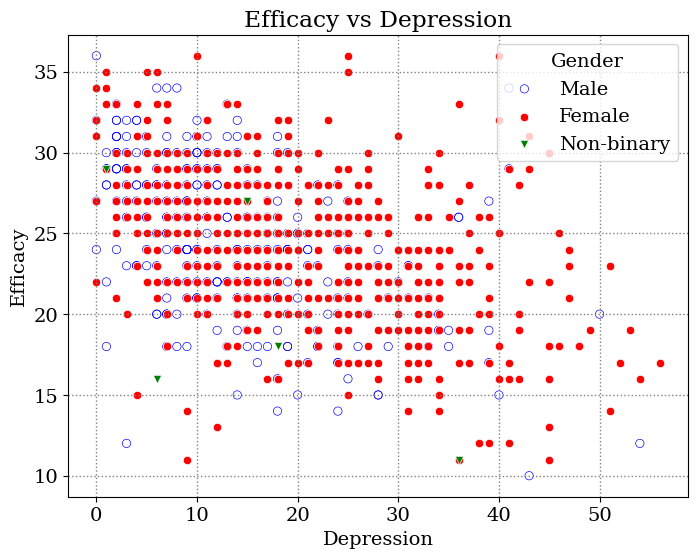

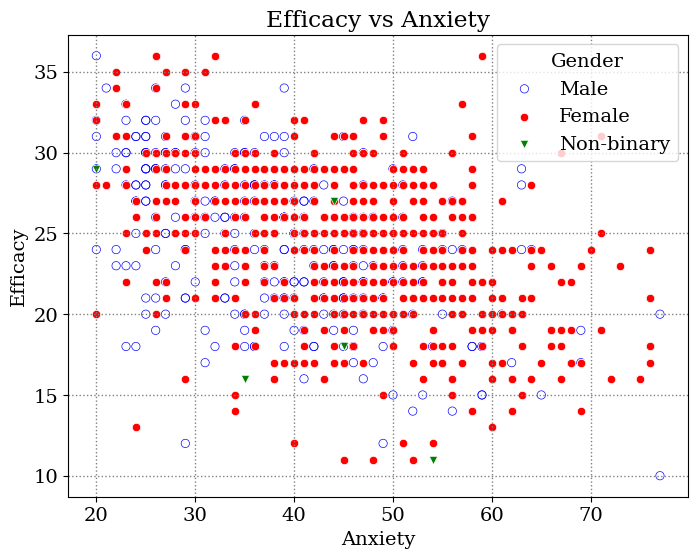

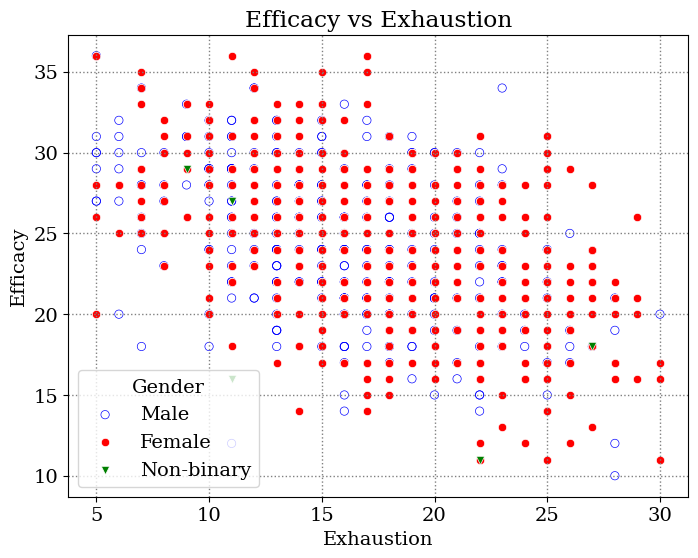

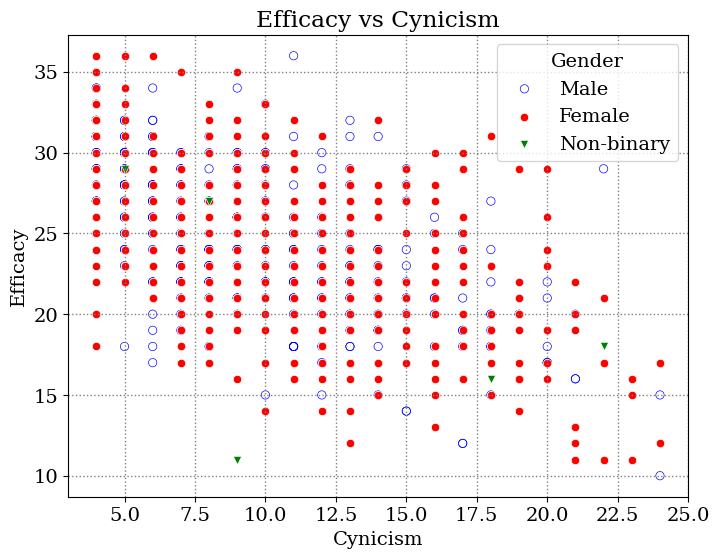

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font for the plots
plt.style.use('default')
plt.rc('font', family='serif', size=14)

target_columns = ['depression', 'anxiety', 'exhaustion', 'cynicism']

# Map numeric values to gender labels
gender_labels = {1: 'Male', 2: 'Female', 3: 'Non-binary'}

# Loop through each target column and create a separate scatter plot image
for column in target_columns:
    plt.figure(figsize=(8, 6))  # Adjust the figsize as needed

    # Plot Male data with non-filled circles
    sns.scatterplot(
        x=column,
        y="efficacy",
        data=train_set_copy.replace({'sex': gender_labels})[train_set_copy['sex'] == 1],
        marker='o',
        facecolors='none',  # Non-filled
        edgecolor='blue',
        label='Male'
    )

    # Plot Female data with filled circles
    sns.scatterplot(
        x=column,
        y="efficacy",
        data=train_set_copy.replace({'sex': gender_labels})[train_set_copy['sex'] == 2],
        marker='o',
        color='red',
        label='Female'
    )

    # Plot Non-binary data with filled triangles
    sns.scatterplot(
        x=column,
        y="efficacy",
        data=train_set_copy.replace({'sex': gender_labels})[train_set_copy['sex'] == 3],
        marker='v',
        color='green',
        label='Non-binary'
    )

    # Set the title for the plot
    plt.title(f'Efficacy vs {column.capitalize()}')

    # Set the x-axis and y-axis labels with capitalized first letters
    plt.xlabel(column.capitalize(), fontfamily='serif', fontsize=14)
    plt.ylabel('Efficacy', fontfamily='serif', fontsize=14)

    # Add a grid with light dotted lines
    plt.grid(True, linestyle=':', linewidth=1, color='grey')

    # Add the legend
    plt.legend(title='Gender')

    # Save the plot as a separate image file
   # plt.savefig(f'/content/Efficacy_vs_{column.capitalize()}.pdf', dpi=600, bbox_inches='tight')

    # Show the plot
    plt.show()


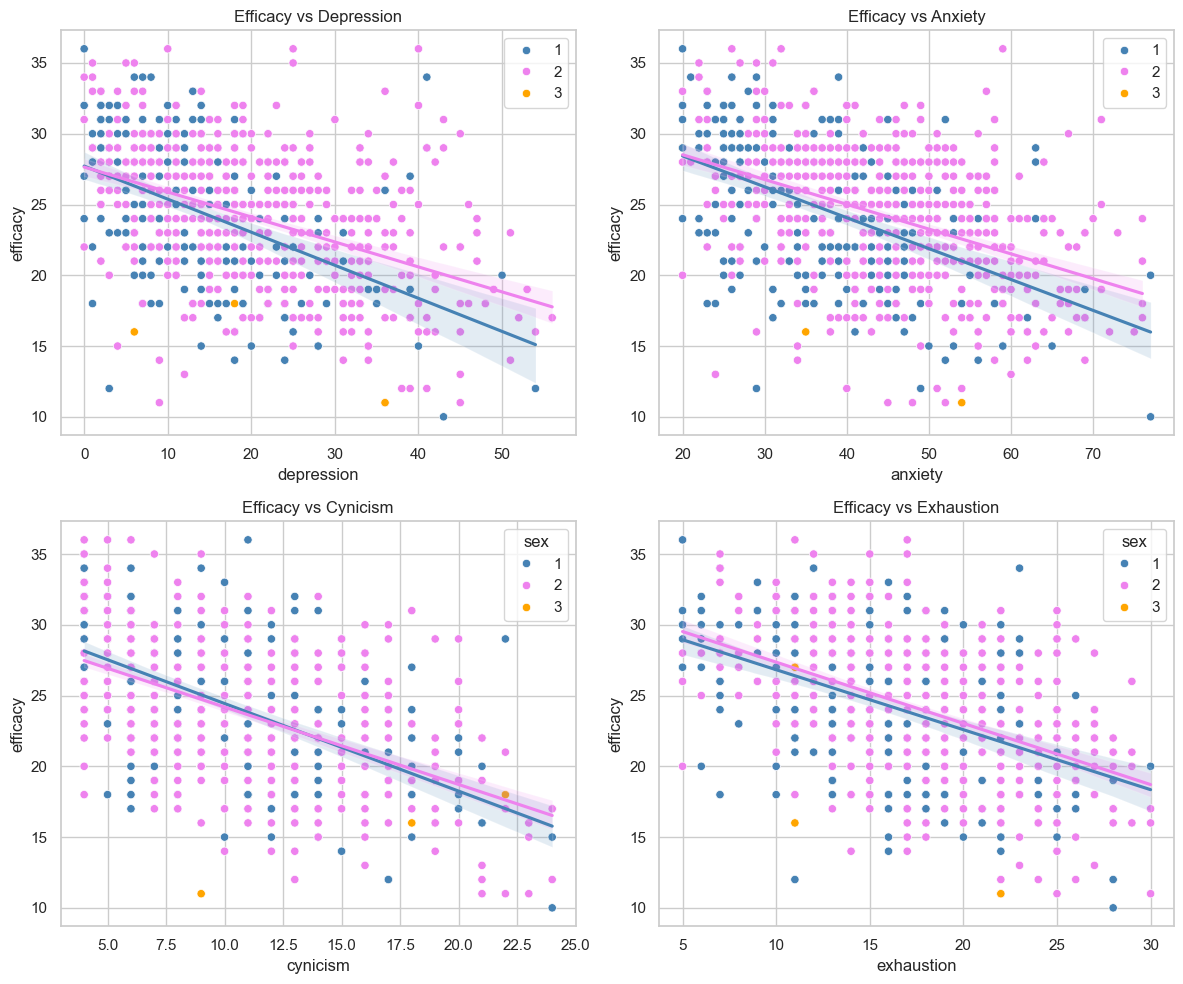

In [107]:
sns.set(style="whitegrid")

# Create a 2x2 grid of plots
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 2, figure=fig)

# Depression vs Efficacy
ax1 = fig.add_subplot(gs[0, 0])
sns.scatterplot(data=train_set_copy, x='depression', y='efficacy', hue='sex', palette={1: "steelblue", 2: "violet",3:"orange"}, ax=ax1)
#sns.regplot(data=train_set_copy, x='depression', y='efficacy', scatter=False, ax=ax1, color="steelblue")
sns.regplot(data=train_set_copy[train_set_copy['sex'] == 1], x='depression', y='efficacy', scatter=False, ax=ax1, color="steelblue")
sns.regplot(data=train_set_copy[train_set_copy['sex'] == 2], x='depression', y='efficacy', scatter=False, ax=ax1, color="violet")
ax1.set_title('Efficacy vs Depression')
ax1.legend()

# Anxiety vs Efficacy
ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(data=train_set_copy, x='anxiety', y='efficacy', hue='sex', palette={1: "steelblue", 2: "violet",3:"orange"}, ax=ax2)
#sns.regplot(data=train_set_copy, x='anxiety', y='efficacy', scatter=False, ax=ax2, color="steelblue")
sns.regplot(data=train_set_copy[train_set_copy['sex'] == 1], x='anxiety', y='efficacy', scatter=False, ax=ax2, color="steelblue")
sns.regplot(data=train_set_copy[train_set_copy['sex'] == 2], x='anxiety', y='efficacy', scatter=False, ax=ax2, color="violet")
ax2.set_title('Efficacy vs Anxiety')
ax2.legend()

# Cynicism vs Efficacy
ax3 = fig.add_subplot(gs[1, 0])
sns.scatterplot(data=train_set_copy, x='cynicism', y='efficacy', hue='sex', palette={1: "steelblue", 2: "violet",3:"orange"}, ax=ax3)
#sns.regplot(data=train_set_copy, x='cynicism', y='efficacy', scatter=False, ax=ax3, color="steelblue")
sns.regplot(data=train_set_copy[train_set_copy['sex'] == 1], x='cynicism', y='efficacy', scatter=False, ax=ax3, color="steelblue")
sns.regplot(data=train_set_copy[train_set_copy['sex'] == 2], x='cynicism', y='efficacy', scatter=False, ax=ax3, color="violet")
ax3.set_title('Efficacy vs Cynicism')

# Exhaustion vs Efficacy
ax4 = fig.add_subplot(gs[1, 1])
sns.scatterplot(data=train_set_copy, x='exhaustion', y='efficacy', hue='sex', palette={1: "steelblue", 2: "violet",3:"orange"}, ax=ax4)
#sns.regplot(data=train_set_copy, x='exhaustion', y='efficacy', scatter=False, ax=ax4, color="steelblue")
sns.regplot(data=train_set_copy[train_set_copy['sex'] == 1], x='exhaustion', y='efficacy', scatter=False, ax=ax4, color="steelblue")
sns.regplot(data=train_set_copy[train_set_copy['sex'] == 2], x='exhaustion', y='efficacy', scatter=False, ax=ax4, color="violet")
ax4.set_title('Efficacy vs Exhaustion')

# Adjust layout
plt.tight_layout()
plt.show()


In [108]:
# Define a function to perform linear regression and return the slope and its p-value
def linear_regression_slope(data, x_var, y_var):
    X = sm.add_constant(data[x_var])  # Add a constant term for the intercept
    y = data[y_var]
    model = sm.OLS(y, X).fit()
    print(model.summary())
    slope = model.params[1]  # Get the slope (coefficient of the x_var)
    p_value = model.pvalues[1]  # Get the p-value of the slope
    return slope, p_value

# Calculate slopes and p-values for males and females
slope_male_depression, p_value_male_depression = linear_regression_slope(train_set_copy[train_set_copy['sex'] == 1], 'depression', 'efficacy')
slope_female_depression, p_value_female_depression = linear_regression_slope(train_set_copy[train_set_copy['sex'] == 2], 'depression', 'efficacy')

slope_male_anxiety, p_value_male_anxiety = linear_regression_slope(train_set_copy[train_set_copy['sex'] == 1], 'anxiety', 'efficacy')
slope_female_anxiety, p_value_female_anxiety = linear_regression_slope(train_set_copy[train_set_copy['sex'] == 2], 'anxiety', 'efficacy')

# Print the results
print(f"Male Depression Slope: {slope_male_depression}, p-value: {p_value_male_depression}")
print(f"Female Depression Slope: {slope_female_depression}, p-value: {p_value_female_depression}")
print(f"Male Anxiety Slope: {slope_male_anxiety}, p-value: {p_value_male_anxiety}")
print(f"Female Anxiety Slope: {slope_female_anxiety}, p-value: {p_value_female_anxiety}")

                            OLS Regression Results                            
Dep. Variable:               efficacy   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     80.91
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           4.08e-17
Time:                        09:54:58   Log-Likelihood:                -784.88
No. Observations:                 275   AIC:                             1574.
Df Residuals:                     273   BIC:                             1581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.7151      0.444     62.459      0.0

C:\Users\User\AppData\Local\Temp\ipykernel_21552\603039848.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]  # Get the slope (coefficient of the x_var)
C:\Users\User\AppData\Local\Temp\ipykernel_21552\603039848.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # Get the p-value of the slope
C:\Users\User\AppData\Local\Temp\ipykernel_21552\603039848.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

# **Relation of academic efficacy and empathy**

In [109]:
empathy_columns = train_set_copy.iloc[:, np.r_[10:15, 19]]
corr_matrix_empathy_columns = empathy_columns.corr()
display(corr_matrix_empathy_columns)

total_empathy  cognitive_empathy  affective_empathy  \
total_empathy             1.000000           0.342668           0.263384   
cognitive_empathy         0.342668           1.000000           0.258696   
affective_empathy         0.263384           0.258696           1.000000   
modify_presentation       0.099395           0.386682          -0.071391   
emotion_recognition       0.097062           0.073708           0.141379   
efficacy                  0.082508           0.184096          -0.113891   

                     modify_presentation  emotion_recognition  efficacy  
total_empathy                   0.099395             0.097062  0.082508  
cognitive_empathy               0.386682             0.073708  0.184096  
affective_empathy              -0.071391             0.141379 -0.113891  
modify_presentation             1.000000             0.002780  0.220616  
emotion_recognition             0.002780             1.000000 -0.034889  
efficacy                        0.220616            -0.034889  1.000000

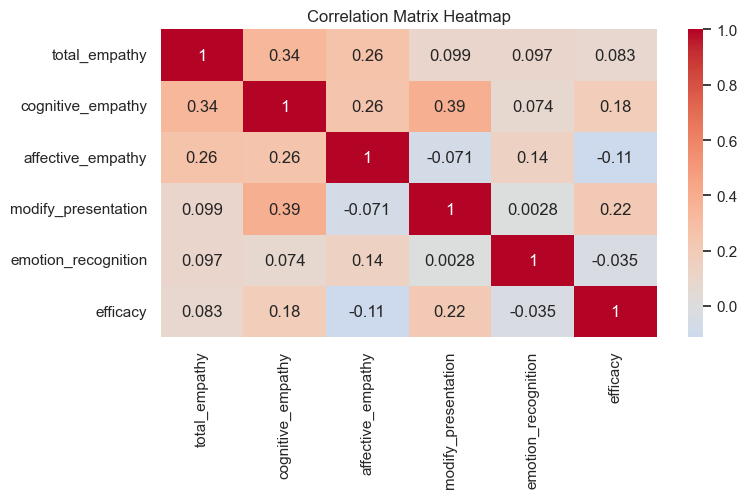

In [110]:
plt.figure(figsize=(8, 4))  # Set the size of the plot
sns.heatmap(corr_matrix_empathy_columns, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

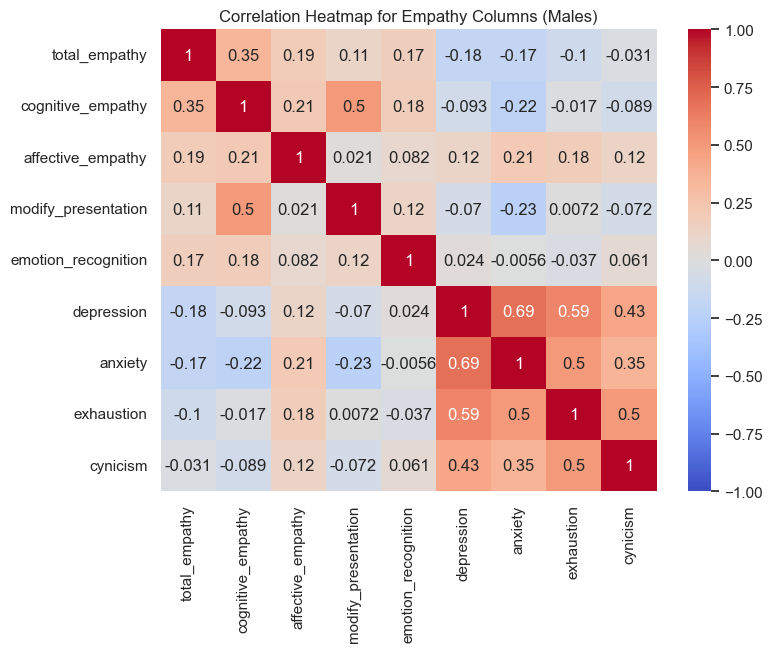

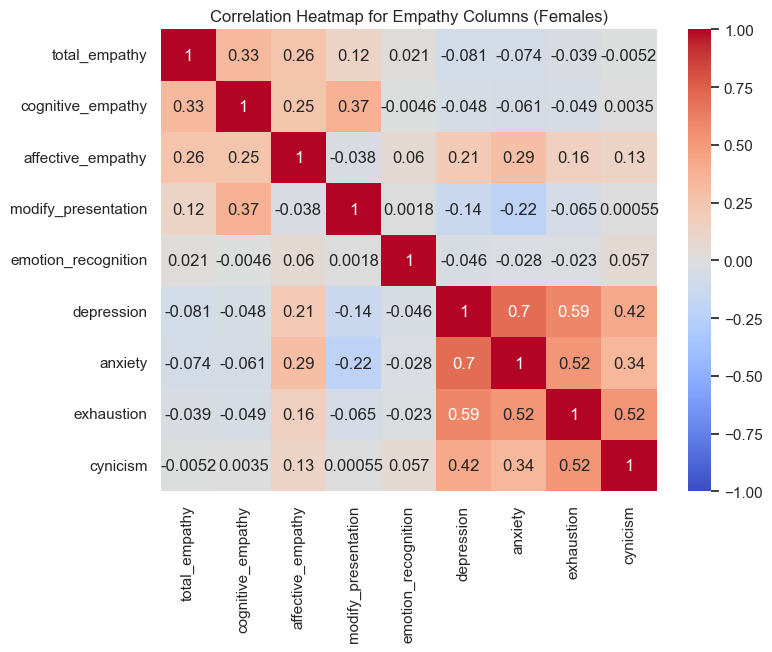

In [111]:
# Filter the dataset for males (sex == 1)
male_data = train_set_copy[train_set_copy['sex'] == 1]
empathy_columns_male = male_data.iloc[:,np.r_[10:19]]
corr_matrix_empathy_male = empathy_columns_male.corr()

# Plot correlation heatmap for males
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_empathy_male, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Empathy Columns (Males)')
plt.show()

# Filter the dataset for females (sex == 2)
female_data = train_set_copy[train_set_copy['sex'] == 2]
empathy_columns_female = female_data.iloc[:, np.r_[10:19]]
corr_matrix_empathy_female = empathy_columns_female.corr()

# Plot correlation heatmap for females
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_empathy_female, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Empathy Columns (Females)')
plt.show()

# ***Correlation Network Analysis***

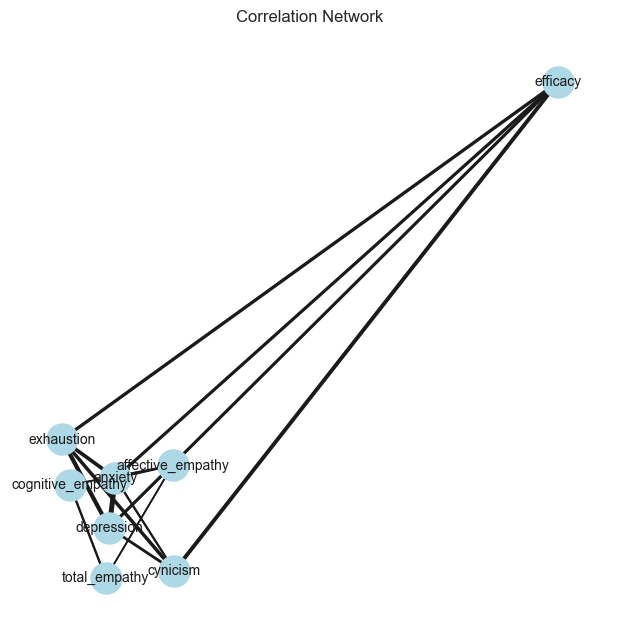

In [112]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import pearsonr
import networkx as nx


data = train_set_copy.iloc[:, np.r_[10:13, 15:20]]
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Threshold for significance (P-value adjustment with Benjamini-Hochberg correction)
alpha = 0.05
p_values = np.array([pearsonr(data[col1], data[col2])[1]
                     for col1 in data.columns for col2 in data.columns]).reshape(correlation_matrix.shape)
_, corrected_p_values, _, _ = multipletests(p_values.flatten(), alpha=alpha, method='fdr_bh')
corrected_p_values = corrected_p_values.reshape(correlation_matrix.shape)

# Create a graph
G = nx.Graph()

# Add nodes (variables)
for col in data.columns:
    G.add_node(col)

# Add edges (correlations) only if significant after correction
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        if i != j and corrected_p_values[i, j] < alpha:
            weight = correlation_matrix.iloc[i, j]
            if abs(weight) >= 0.25:  # Consider correlations with r >= 0.25
                G.add_edge(col1, col2, weight=weight)

# Plot the graph
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G)
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight']*5 for (u, v, d) in edges])

plt.title('Correlation Network')
plt.show()

In [113]:
#Calculate correlation matrix and p-values
correlations = data.corr()
p_values = np.zeros_like(correlations)

for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        if i != j:
            _, p_values[i, j] = pearsonr(data.iloc[:, i], data.iloc[:, j])

# Apply Benjamini-Hochberg correction for multiple comparisons
p_values_flat = p_values.flatten()
_, corrected_p_values_flat, _, _ = multipletests(p_values_flat, method='fdr_bh')
corrected_p_values = corrected_p_values_flat.reshape(p_values.shape)

# Apply thresholds (r >= 0.25 and p < 0.05)
significant_edges = np.where((np.abs(correlations) >= 0.25) & (corrected_p_values < 0.05), correlations, 0)

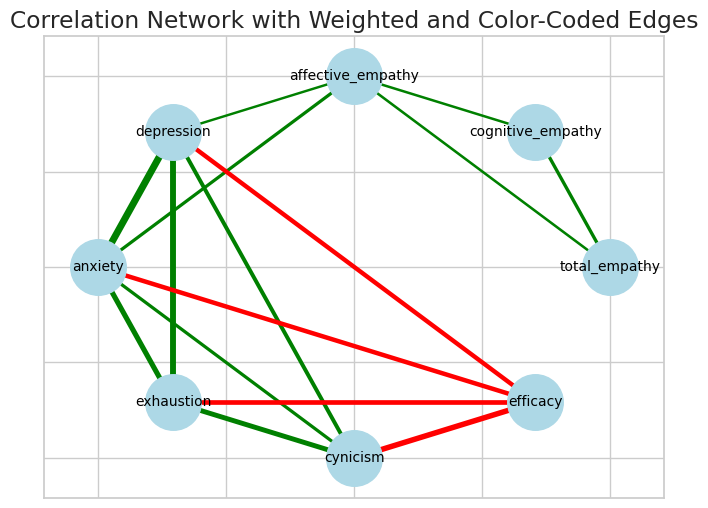

In [114]:
# Create an undirected graph
G = nx.Graph()

# Add nodes (symptoms)
for col in data.columns:
    G.add_node(col)


# Add edges for significant correlations with edge weights
for i in range(len(data.columns)):
    for j in range(i + 1, len(data.columns)):  # Avoid duplicate edges
        if significant_edges[i, j] != 0:
            # Determine edge color based on the sign of correlation
            color = 'green' if significant_edges[i, j] > 0 else 'red'
            G.add_edge(data.columns[i], data.columns[j], weight=significant_edges[i, j], color=color)

# Extract edges and colors
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]
colors = [d['color'] for (u, v, d) in edges]

# Normalize weights for edge width
norm_weights = [abs(w) for w in weights]

# ciruclar layout for easy visualization
pos = nx.circular_layout(G)

# Plot the graph
plt.figure(figsize=(8, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1600)

# Draw edges with color coding based on weights
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors, width=[w*7 for w in norm_weights])

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.style.use('default')  # Reset style to default
plt.rc('font', family='serif', size=14)

plt.title('Correlation Network with Weighted and Color-Coded Edges')

# Show the plot
plt.show()

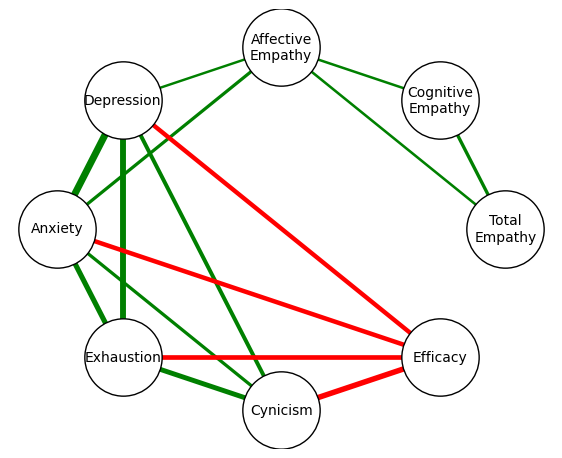

In [115]:
# Original node names
node_names = {
    'total_empathy': 'Total\nEmpathy',
    'cognitive_empathy': 'Cognitive\nEmpathy',
    'affective_empathy': 'Affective\nEmpathy',
    'exhaustion': 'Exhaustion',
    'depression': 'Depression',
    'anxiety': 'Anxiety',
    'efficacy': 'Efficacy',
    'cynicism': 'Cynicism'

}

# Rename nodes in the graph
G = nx.relabel_nodes(G, node_names)

# Extract edges and colors again after renaming nodes
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]
colors = [d['color'] for (u, v, d) in edges]

# Normalize weights for edge width
norm_weights = [abs(w) for w in weights]

# Circular layout for easy visualization
pos = nx.circular_layout(G,scale=1)
# pos = nx.spring_layout(G, k=30, seed=16) 

# Plot the graph
plt.figure(figsize=(7, 5.7))

# Draw nodes
#nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=7800)
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=3100,edgecolors='black')

# Draw edges with color coding based on weights
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors, width=[w*7 for w in norm_weights])

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight='regular')



plt.axis('off')

# Adjust layout to prevent cutting off nodes
#plt.tight_layout()

#Save the figure
plt.savefig('content/Correlation Network with Weighted and Color-Coded Edges-1.png', dpi=500, bbox_inches='tight')
plt.savefig('content/Correlation Network with Weighted and Color-Coded Edges-1.pdf', dpi=500, bbox_inches='tight')
# Show the plot
plt.show()


In [116]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
import networkx as nx
from networkx.algorithms.clique import find_cliques
from networkx.algorithms.approximation import clique

# Identify all maximal cliques
cliques = list(find_cliques(G))

# Find the largest maximal clique (i.e., the maximum clique)
maximum_clique = max(cliques, key=len)

print("Maximal Cliques: ", cliques)
print("Maximum Clique: ", maximum_clique)

Maximal Cliques:  [['Anxiety', 'Depression', 'Exhaustion', 'Efficacy', 'Cynicism'], ['Anxiety', 'Depression', 'Affective\nEmpathy'], ['Cognitive\nEmpathy', 'Affective\nEmpathy', 'Total\nEmpathy']]
Maximum Clique:  ['Anxiety', 'Depression', 'Exhaustion', 'Efficacy', 'Cynicism']


Maximal Cliques:  [['Anxiety', 'Depression', 'Exhaustion', 'Efficacy', 'Cynicism'], ['Anxiety', 'Depression', 'Affective\nEmpathy'], ['Cognitive\nEmpathy', 'Affective\nEmpathy', 'Total\nEmpathy']]
Maximum Clique:  ['Anxiety', 'Depression', 'Exhaustion', 'Efficacy', 'Cynicism']


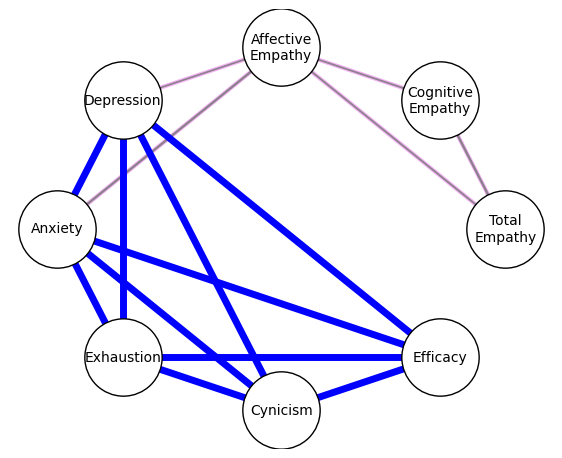

In [118]:
### Identifying Cliques

# Identify all maximal cliques
cliques = list(find_cliques(G))

# Find the largest maximal clique (i.e., the maximum clique)
maximum_clique = max(cliques, key=len)

print("Maximal Cliques: ", cliques)
print("Maximum Clique: ", maximum_clique)

### Visualize Cliques

# Create a new plot to visualize the cliques // (10,6)-->3800-->19
# plt.figure(figsize=(11, 8))
plt.figure(figsize=(7, 5.7))

# Draw the base network again
# nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=7800)
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=3100,edgecolors='black')
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors, width=[w*5 for w in norm_weights])
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")# was 10

# Highlight maximal cliques (all cliques) with blue edges
for clique in cliques:
    clique_edges = [(clique[i], clique[j]) for i in range(len(clique)) for j in range(i + 1, len(clique))]
    nx.draw_networkx_edges(G, pos, edgelist=clique_edges, edge_color='violet', width=3, alpha=0.6)

# Highlight the maximum clique with darker blue edges
max_clique_edges = [(maximum_clique[i], maximum_clique[j]) for i in range(len(maximum_clique)) for j in range(i + 1, len(maximum_clique))]
nx.draw_networkx_edges(G, pos, edgelist=max_clique_edges, edge_color='blue', width=5, alpha=1.0)

#plt.title('Correlation Network with Maximal and Maximum Cliques')
plt.axis('off')

#Save the figure
plt.savefig('content/Correlation Network with Maximal and Maximum Cliques-1.pdf', dpi=500, bbox_inches='tight')
plt.savefig('content/Correlation Network with Maximal and Maximum Cliques-1.png', dpi=500, bbox_inches='tight')
# Show the plot
plt.show()

In [119]:
# Calculate correlation matrix
correlations = data.corr()

# Calculate p-values for each correlation
p_values = np.zeros_like(correlations)
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        if i != j:
            _, p_values[i, j] = pearsonr(data.iloc[:, i], data.iloc[:, j])

# Apply Benjamini-Hochberg correction
p_values_flat = p_values.flatten()
_, corrected_p_values_flat, _, _ = multipletests(p_values_flat, method='fdr_bh')
corrected_p_values = corrected_p_values_flat.reshape(p_values.shape)

# Create a matrix for storing the correlation coefficients and significance asterisks
formatted_matrix = pd.DataFrame(index=correlations.index, columns=correlations.columns)

# Apply thresholds and add stars based on significance levels
for i in range(data.shape[1]):
    for j in range(i + 1):
        corr_value = correlations.iloc[i, j]
        if corrected_p_values[i, j] < 0.001:
            star = '***'
        elif corrected_p_values[i, j] < 0.01:
            star = '**'
        elif corrected_p_values[i, j] < 0.05:
            star = '*'
        else:
            star = ''
        formatted_matrix.iloc[i, j] = f"{corr_value:.2f}{star}"
        formatted_matrix.iloc[j, i] = ''  # Set upper triangle to empty

# Convert the formatted matrix to a LaTeX table format
latex_table = formatted_matrix.to_latex()

# Display the formatted correlation matrix
print("Formatted Correlation Matrix:\n")
print(formatted_matrix)

# Display the LaTeX table
print("\nLaTeX Table:\n")
print(latex_table)

Formatted Correlation Matrix:

                  total_empathy cognitive_empathy affective_empathy  \
total_empathy                                                         
cognitive_empathy       0.34***                                       
affective_empathy       0.26***           0.26***                     
depression               -0.08*             -0.03           0.25***   
anxiety                  -0.08*            -0.08*           0.33***   
exhaustion                -0.04             -0.02           0.22***   
cynicism                  -0.01             -0.02           0.13***   
efficacy                  0.08*           0.18***          -0.11***   

                  depression   anxiety exhaustion  cynicism efficacy  
total_empathy                                                         
cognitive_empathy                                                     
affective_empathy                                                     
depression                                   

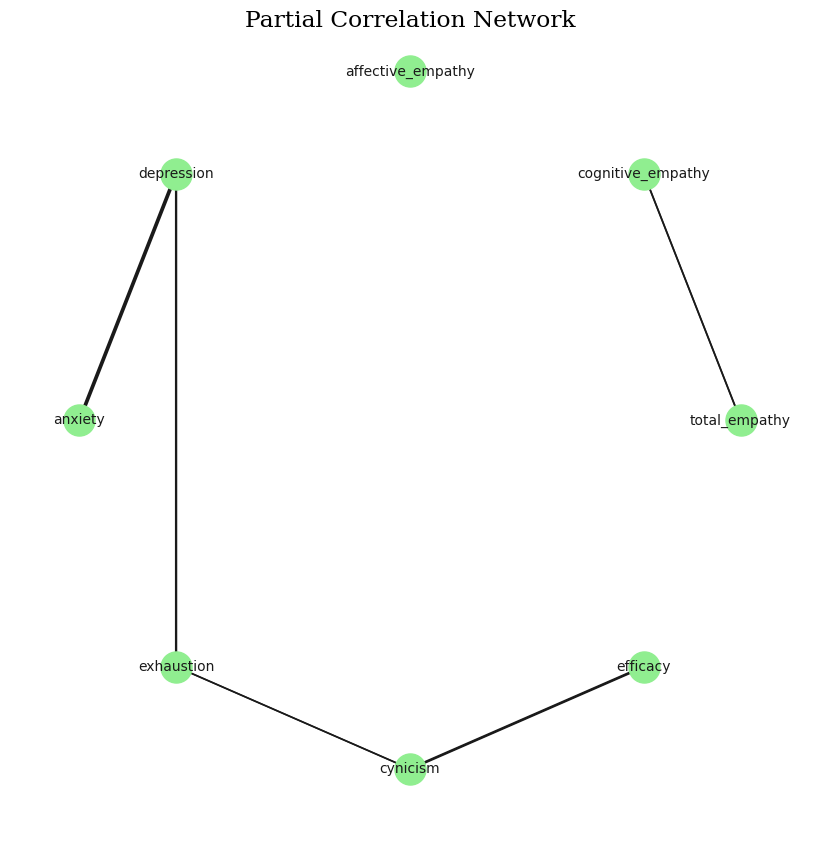

In [120]:
from sklearn.covariance import GraphicalLassoCV

# Fit a Graphical Lasso model to estimate partial correlations
model = GraphicalLassoCV()
model.fit(data)

# Extract the partial correlation matrix
partial_corr_matrix = -model.precision_ / np.sqrt(np.outer(np.diag(model.precision_), np.diag(model.precision_)))

# Create a graph for partial correlations
G_partial = nx.Graph()

# Add nodes (variables)
for col in data.columns:
    G_partial.add_node(col)

# Add edges (partial correlations) only if significant
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        if i != j and abs(partial_corr_matrix[i, j]) >= 0.25:
            G_partial.add_edge(col1, col2, weight=partial_corr_matrix[i, j])

# Plot the partial correlation network
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G_partial)
edges = G_partial.edges(data=True)

nx.draw(G_partial, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=10)
nx.draw_networkx_edges(G_partial, pos, edgelist=edges, width=[abs(d['weight'])*5 for (u, v, d) in edges])

plt.title('Partial Correlation Network')
plt.show()


# **Relation between depression, anxiety, exhaustion, and academic efficacy.**

In [121]:
empathy_columns = train_set_copy.iloc[:, np.r_[15:20]]
corr_matrix_empathy_columns = empathy_columns.corr()
display(corr_matrix_empathy_columns)

depression   anxiety  exhaustion  cynicism  efficacy
depression    1.000000  0.715728    0.605617  0.407727 -0.453589
anxiety       0.715728  1.000000    0.530486  0.331884 -0.462535
exhaustion    0.605617  0.530486    1.000000  0.505200 -0.480821
cynicism      0.407727  0.331884    0.505200  1.000000 -0.565939
efficacy     -0.453589 -0.462535   -0.480821 -0.565939  1.000000

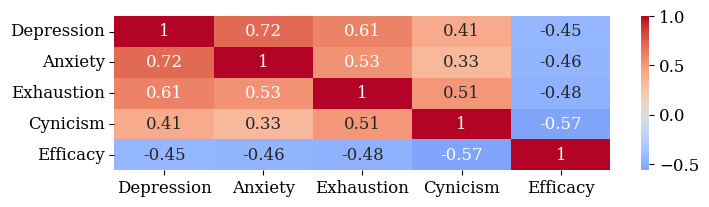

In [122]:
# Capitalize the column and index names
corr_matrix_empathy_columns = corr_matrix_empathy_columns.rename(
    columns=lambda x: x.capitalize(),
    index=lambda x: x.capitalize()
)

plt.style.use('default')  # Reset style to default
# Set font and plot the heatmap
plt.rc('font', family='serif', size=12)
plt.figure(figsize=(8, 2))  # Set the size of the plot
sns.heatmap(corr_matrix_empathy_columns, annot=True, cmap='coolwarm', center=0)

# Set title and show the plot
#plt.title('Correlation Matrix Heatmap')
plt.savefig('content/cmh between dep,anx,exh,cy,efficacy.pdf', dpi=500, bbox_inches='tight')
plt.savefig('content/cmh between dep,anx,exh,cy,efficacy.png', dpi=500, bbox_inches='tight')
plt.show()

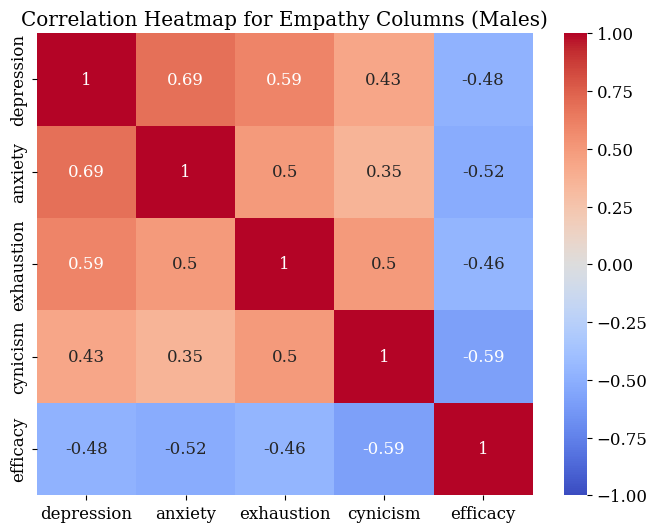

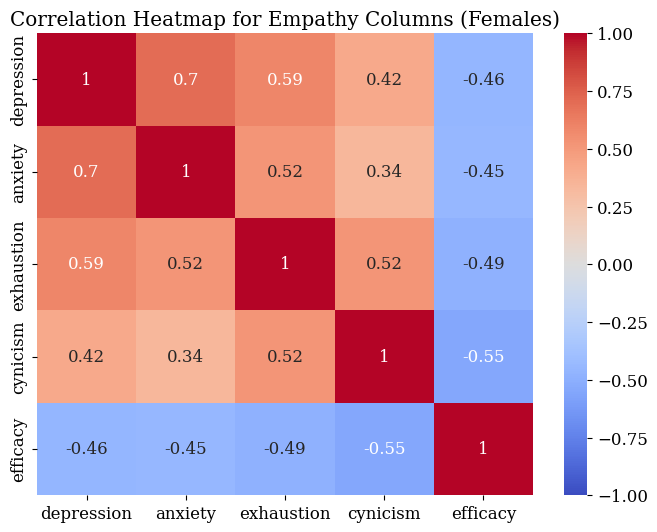

In [123]:
# Filter the dataset for males (sex == 1)
male_data = train_set_copy[train_set_copy['sex'] == 1]
empathy_columns_male = male_data.iloc[:, np.r_[15:20]]
corr_matrix_empathy_male = empathy_columns_male.corr()

# Plot correlation heatmap for males
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_empathy_male, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Empathy Columns (Males)')
plt.show()

# Filter the dataset for females (sex == 2)
female_data = train_set_copy[train_set_copy['sex'] == 2]
empathy_columns_female = female_data.iloc[:, np.r_[15:20]]
corr_matrix_empathy_female = empathy_columns_female.corr()

# Plot correlation heatmap for females
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_empathy_female, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Empathy Columns (Females)')
plt.show()

No meaningful corelation between efficacy and empathy factors.

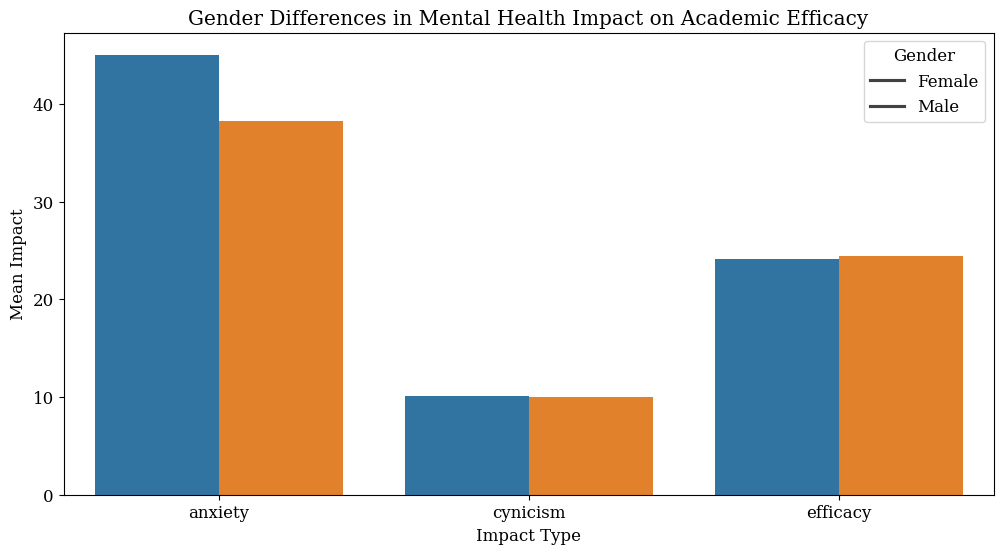

In [124]:
# Filter the data to include only Male and Female
filtered_data = input.copy()
# Map the 'sex' column to 'Male', 'Female', and 'Other' strings
filtered_data['sex'] = filtered_data['sex'].map({1: 'Male', 2: 'Female', 3: 'Other'})

# Filter the data to include only Male and Female
filtered_data = filtered_data[filtered_data['sex'].isin(['Male', 'Female'])]
# Group by gender and calculate the mean impact of anxiety and cynicism on academic efficacy
mean_impacts = filtered_data.groupby('sex').agg({
    'anxiety': 'mean',
    'cynicism': 'mean',
    'efficacy': 'mean'
}).reset_index()

# Melt the DataFrame for easier plotting
mean_impacts_melted = mean_impacts.melt(id_vars='sex', value_vars=['anxiety', 'cynicism', 'efficacy'],
                                        var_name='Impact_Type', value_name='Mean_Impact')

# Create bar plots
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_impacts_melted, x='Impact_Type', y='Mean_Impact', hue='sex')
plt.title('Gender Differences in Mental Health Impact on Academic Efficacy')
plt.xlabel('Impact Type')
plt.ylabel('Mean Impact')
plt.legend(title='Gender', labels=['Female', 'Male'])  # Adjust labels as per your dataset's encoding
plt.show()

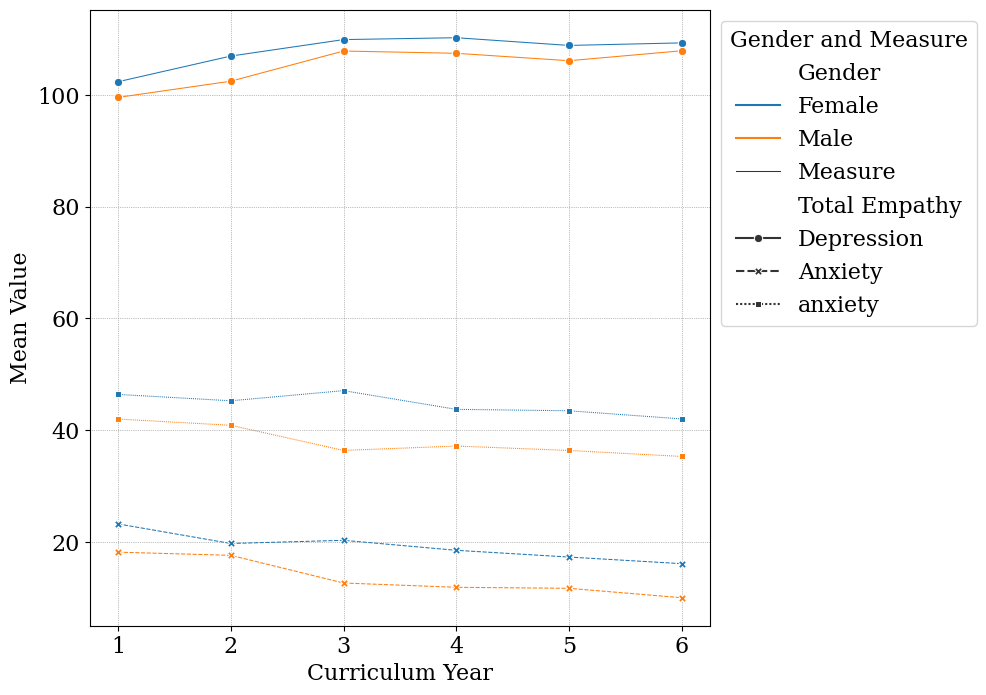

In [125]:
df=input.copy()
# Map the 'sex' column to 'Male' and 'Female' strings
df['sex'] = df['sex'].map({1: 'Male', 2: 'Female'})
# Group by curriculum year and gender, then calculate the mean values
grouped_data = df.groupby(['year', 'sex']).agg({
    'total_empathy': 'mean',
    'depression': 'mean',
    'anxiety': 'mean'
}).reset_index()

# Melt the DataFrame for easier plotting
melted_data = grouped_data.melt(id_vars=['year', 'sex'],
                                value_vars=['total_empathy','depression','anxiety',],
                                var_name='Measure', value_name='Mean_Value')


plt.style.use('default')  # Reset style to default
plt.rc('font', family='serif', size=16)
# Create line plots
plt.figure(figsize=(8, 8))
sns.lineplot(data=melted_data, x='year', y='Mean_Value', hue='sex', style='Measure', markers=True, size= 19)
# Add a grid with light dotted lines
plt.grid(True, linestyle=':', linewidth=0.5, color='grey')
#plt.title('Trends in Empathy, Cynicism, and Academic Efficacy Across Curriculum Years, Separated by Gender')
plt.xlabel('Curriculum Year')
plt.ylabel('Mean Value')
legend = plt.legend(title='Gender and Measure', bbox_to_anchor=(1,1), loc='upper left',fontsize=16)
legend.get_texts()[0].set_text('Gender')
legend.get_texts()[1].set_text('Female')
legend.get_texts()[2].set_text('Male')
legend.get_texts()[3].set_text('Measure')
legend.get_texts()[4].set_text('Total Empathy')
legend.get_texts()[5].set_text('Depression')
legend.get_texts()[6].set_text('Anxiety')
plt.savefig('content/Trends in Empathy, Cynicism, and Academic Efficacy Across Curriculum Years, Separated by Gender.pdf', dpi=500, bbox_inches='tight')
plt.show()

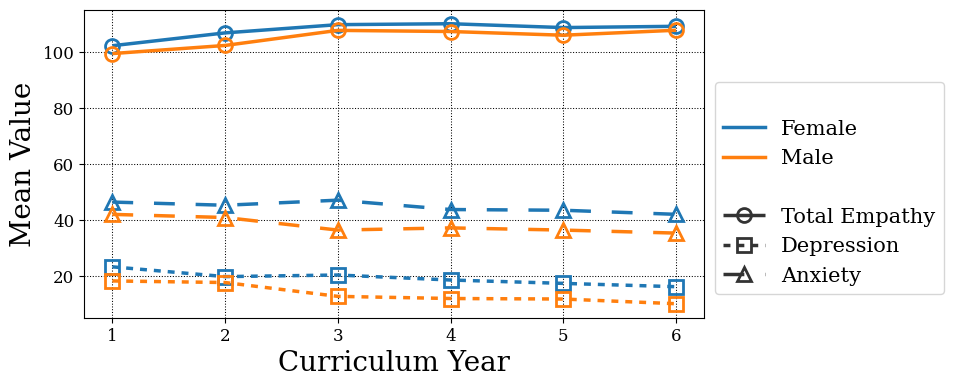

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'input' is your DataFrame
df = input.copy()

# Map the 'sex' column to 'Male' and 'Female' strings
df['sex'] = df['sex'].map({1: 'Male', 2: 'Female'})

# Group by curriculum year and gender, then calculate the mean values
grouped_data = df.groupby(['year', 'sex']).agg({
    'total_empathy': 'mean',
    'depression': 'mean',
    'anxiety': 'mean'
}).reset_index()

# Melt the DataFrame for easier plotting
melted_data = grouped_data.melt(id_vars=['year', 'sex'],
                                value_vars=['total_empathy', 'depression', 'anxiety'],
                                var_name='Measure', value_name='Mean_Value')

plt.style.use('default')  # Reset style to default
plt.rc('font', family='serif', size=12)

# Create line plots with distinguishable line styles and markers
plt.figure(figsize=(8, 4))
sns.lineplot(data=melted_data, x='year', y='Mean_Value', hue='sex', style='Measure',
             markers=['o', 's', '^'], dashes=[(2, 0), (2, 2), (6, 6)], markersize=10, linewidth=2.5)

plt.xlabel(column.capitalize(), fontfamily='serif', fontsize=20)
plt.ylabel(column.capitalize(), fontfamily='serif', fontsize=20)
plt.xlabel('Curriculum Year')
plt.ylabel('Mean Value')

# Manually set markers to have no fill
for line in plt.gca().get_lines():
    line.set_markerfacecolor('none')  # Remove marker fill (no fill)
    line.set_markeredgewidth(2)        # Set the marker edge width
    line.set_markeredgecolor(line.get_color())  # Set marker edge color to line color

# Add a grid with light dotted lines
plt.grid(True, linestyle=':', linewidth=0.75, color='black')

# Customize the legend for better clarity
legend = plt.legend(title='Gender and Measure', bbox_to_anchor=(1, 0.8), loc='upper left', fontsize=15)
legend=plt.legend( bbox_to_anchor=(1, 0.8),fontsize=15)
legend.get_texts()[0].set_text('')
legend.get_texts()[1].set_text('Female')
legend.get_texts()[2].set_text('Male')
legend.get_texts()[3].set_text('')
legend.get_texts()[4].set_text('Total Empathy')
legend.get_texts()[5].set_text('Depression')
legend.get_texts()[6].set_text('Anxiety')

# legend.get_texts()[0].set_text('Female')
# legend.get_texts()[1].set_text('Male')
# legend.get_texts()[2].set_text('Total Empathy')
# legend.get_texts()[3].set_text('Depression')
# legend.get_texts()[4].set_text('Anxiety')

# Save the plot as a PDF
plt.savefig('content/Trends in Empathy, Cynicism, and Academic Efficacy Across Curriculum Years, Separated by Gender.pdf', dpi=500, bbox_inches='tight')
# Save the plot as a PDF
plt.savefig('content/Trends in Empathy, Cynicism, and Academic Efficacy Across Curriculum Years, Separated by Gender.png', dpi=500, bbox_inches='tight')
plt.show()


Regression results for total_empathy (Sex=1):
                             OLS Regression Results                            
Dep. Variable:          total_empathy   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     7.616
Date:                Thu, 26 Sep 2024   Prob (F-statistic):             0.0509
Time:                        09:55:04   Log-Likelihood:                -12.209
No. Observations:                   6   AIC:                             28.42
Df Residuals:                       4   BIC:                             28.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<Figure size 1200x800 with 0 Axes>

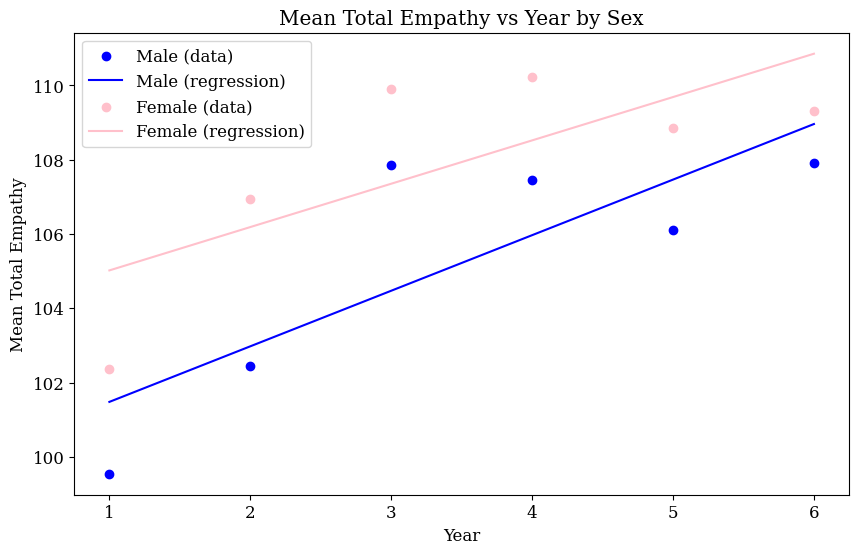

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Regression results for cognitive_empathy (Sex=1):
                             OLS Regression Results                            
Dep. Variable:      cognitive_empathy   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.243
Method:                 Least Squares   F-statistic:                   0.02214
Date:                Thu, 26 Sep 2024   Prob (F-statistic):              0.889
Time:                        09:55:04   Log-Likelihood:                -9.3194
No. Observations:                   6   AIC:                             22.64
Df Residuals:                       4   BIC:                             22.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

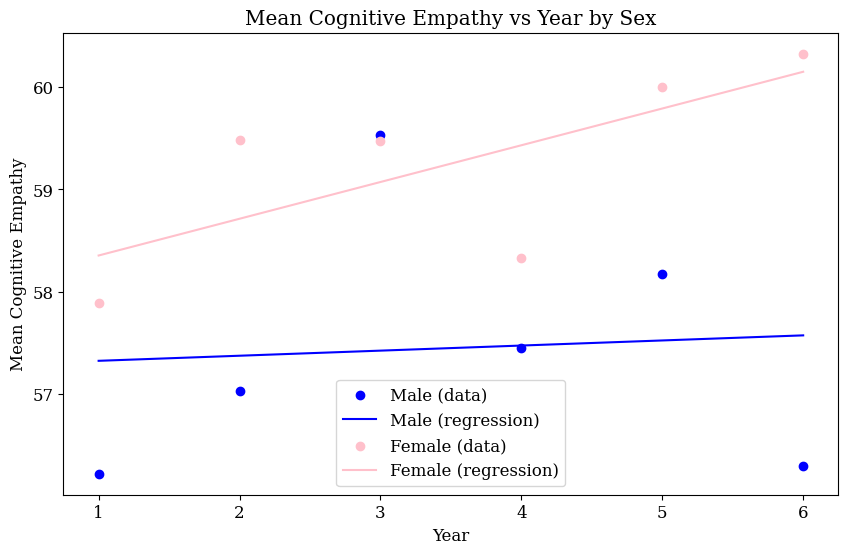

Regression results for affective_empathy (Sex=1):
                             OLS Regression Results                            
Dep. Variable:      affective_empathy   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.208
Method:                 Least Squares   F-statistic:                    0.1399
Date:                Thu, 26 Sep 2024   Prob (F-statistic):              0.727
Time:                        09:55:04   Log-Likelihood:                -7.1940
No. Observations:                   6   AIC:                             18.39
Df Residuals:                       4   BIC:                             17.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


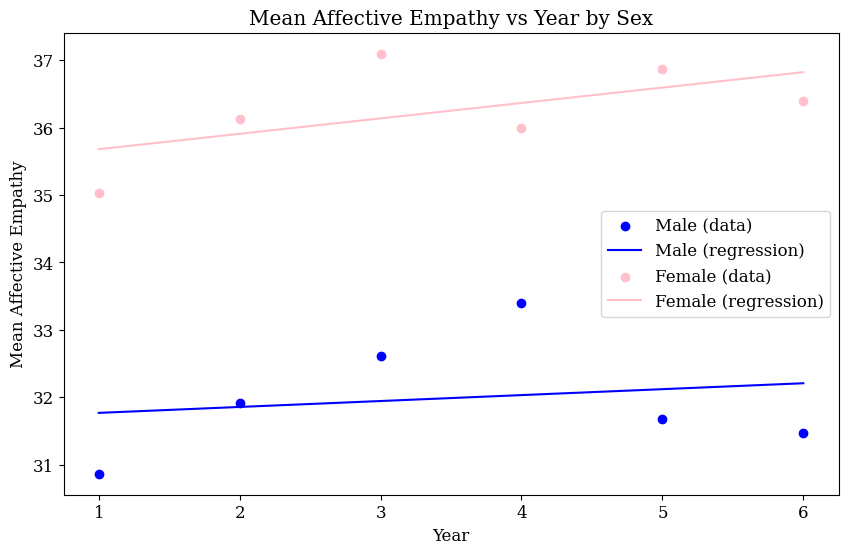

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Regression results for modify_presentation (Sex=1):
                              OLS Regression Results                            
Dep. Variable:     modify_presentation   R-squared:                       0.136
Model:                             OLS   Adj. R-squared:                 -0.080
Method:                  Least Squares   F-statistic:                    0.6315
Date:                 Thu, 26 Sep 2024   Prob (F-statistic):              0.471
Time:                         09:55:04   Log-Likelihood:                -5.1323
No. Observations:                    6   AIC:                             14.26
Df Residuals:                        4   BIC:                             13.85
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

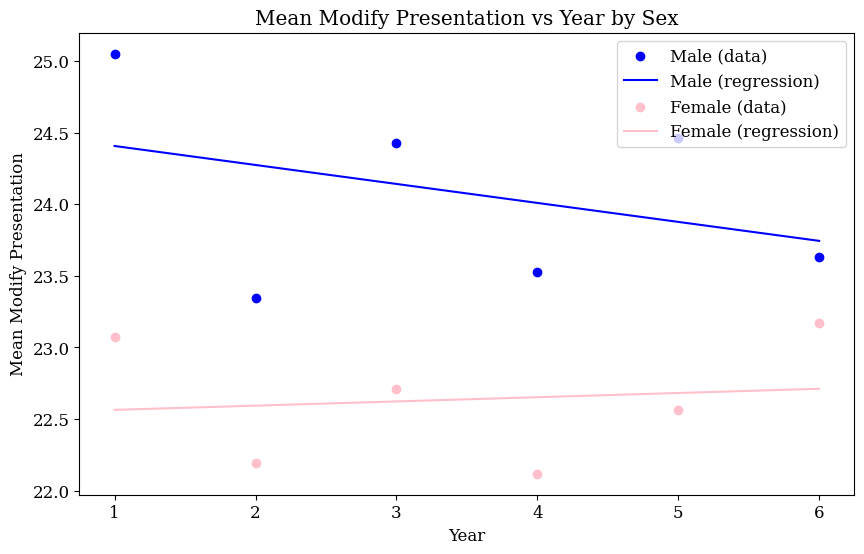

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Regression results for emotion_recognition (Sex=1):
                              OLS Regression Results                            
Dep. Variable:     emotion_recognition   R-squared:                       0.134
Model:                             OLS   Adj. R-squared:                 -0.082
Method:                  Least Squares   F-statistic:                    0.6194
Date:                 Thu, 26 Sep 2024   Prob (F-statistic):              0.475
Time:                         09:55:05   Log-Likelihood:                 16.021
No. Observations:                    6   AIC:                            -28.04
Df Residuals:                        4   BIC:                            -28.46
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

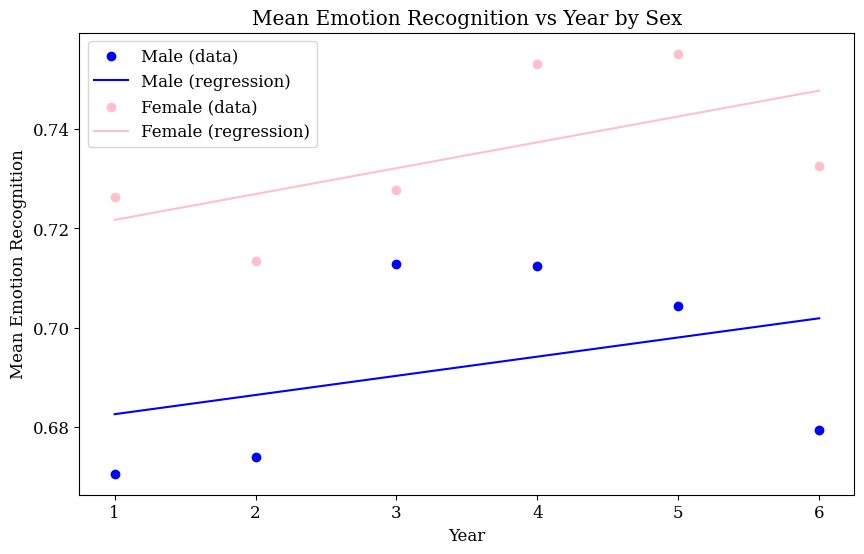

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Regression results for depression (Sex=1):
                             OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     28.52
Date:                Thu, 26 Sep 2024   Prob (F-statistic):            0.00592
Time:                        09:55:05   Log-Likelihood:                -8.9931
No. Observations:                   6   AIC:                             21.99
Df Residuals:                       4   BIC:                             21.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

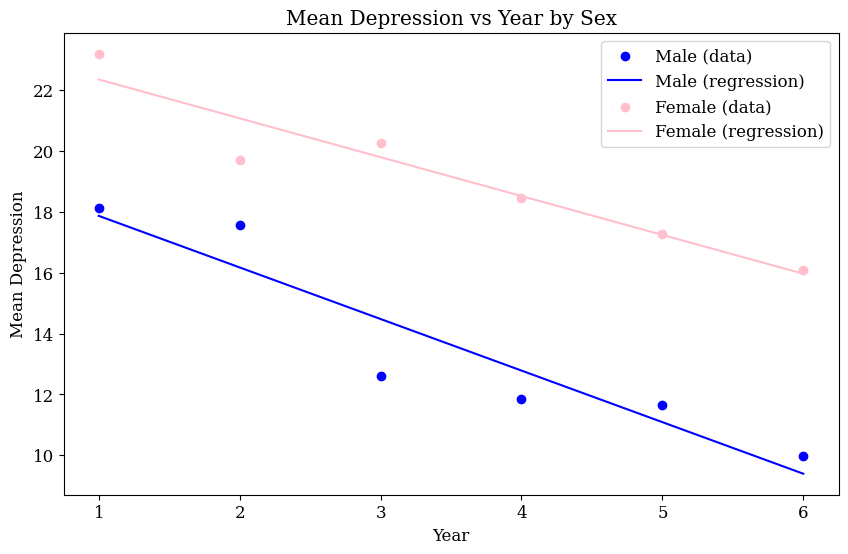

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Regression results for anxiety (Sex=1):
                             OLS Regression Results                            
Dep. Variable:                anxiety   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     17.40
Date:                Thu, 26 Sep 2024   Prob (F-statistic):             0.0140
Time:                        09:55:05   Log-Likelihood:                -8.9829
No. Observations:                   6   AIC:                             21.97
Df Residuals:                       4   BIC:                             21.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

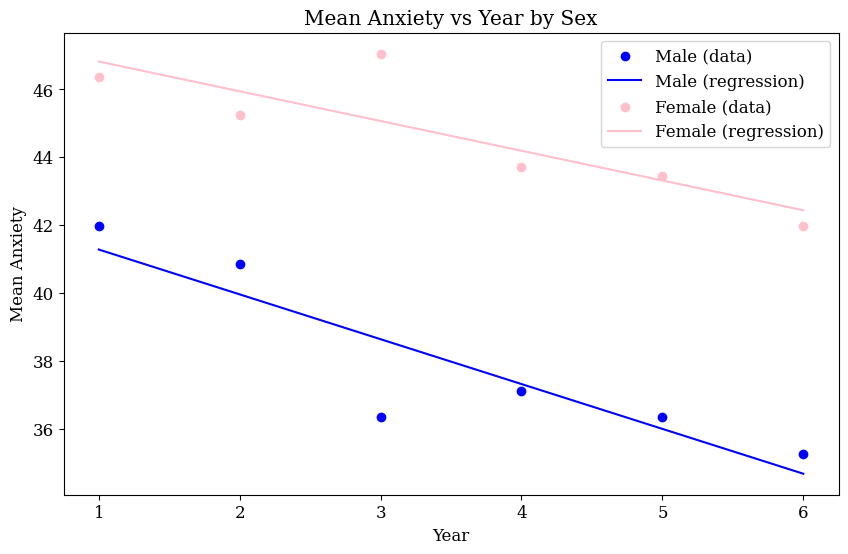

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Regression results for exhaustion (Sex=1):
                             OLS Regression Results                            
Dep. Variable:             exhaustion   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     18.51
Date:                Thu, 26 Sep 2024   Prob (F-statistic):             0.0126
Time:                        09:55:05   Log-Likelihood:                -6.7140
No. Observations:                   6   AIC:                             17.43
Df Residuals:                       4   BIC:                             17.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

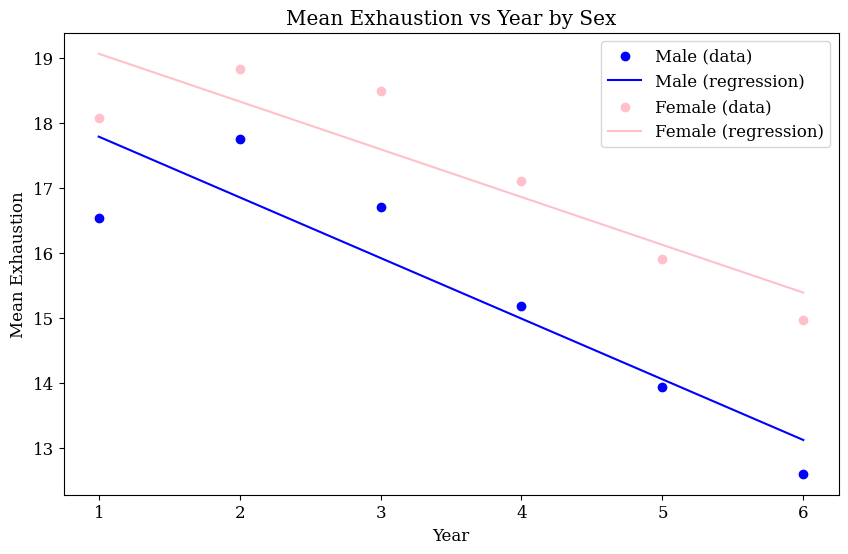

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Regression results for cynicism (Sex=1):
                             OLS Regression Results                            
Dep. Variable:               cynicism   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     2.842
Date:                Thu, 26 Sep 2024   Prob (F-statistic):              0.167
Time:                        09:55:05   Log-Likelihood:                -6.0730
No. Observations:                   6   AIC:                             16.15
Df Residuals:                       4   BIC:                             15.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

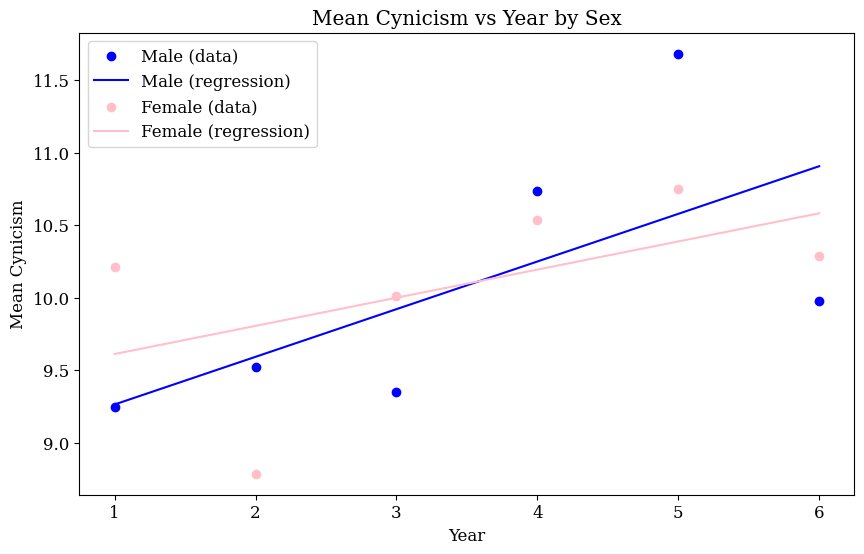

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Regression results for efficacy (Sex=1):
                             OLS Regression Results                            
Dep. Variable:               efficacy   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.231
Method:                 Least Squares   F-statistic:                   0.06130
Date:                Thu, 26 Sep 2024   Prob (F-statistic):              0.817
Time:                        09:55:05   Log-Likelihood:                -2.6096
No. Observations:                   6   AIC:                             9.219
Df Residuals:                       4   BIC:                             8.803
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

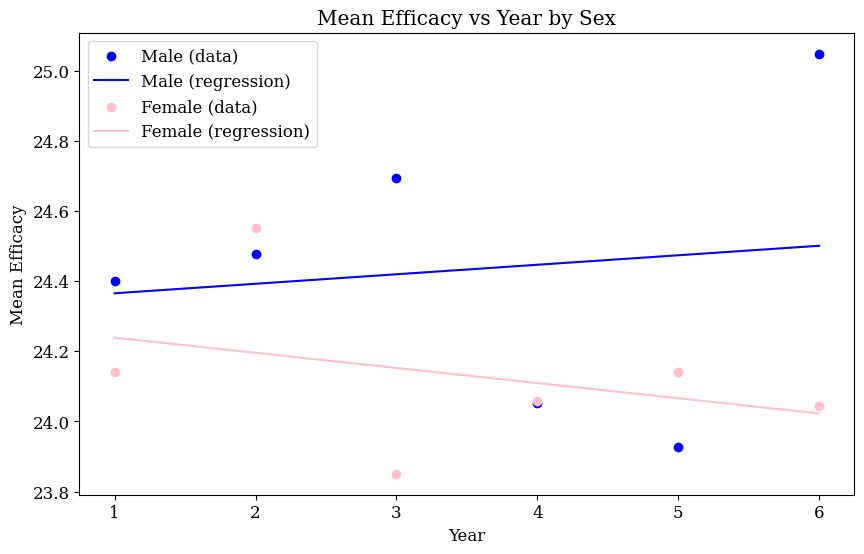

In [127]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df=input.copy()
# List of dependent variables
dependent_vars = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]


# Plotting setup
plt.figure(figsize=(12, 8))

colors = {1: 'blue', 2: 'pink'}
labels = {1: 'Male', 2: 'Female'}

for var in dependent_vars:
    plt.figure(figsize=(10, 6))

    for sex in [1, 2]:  # Loop over male and female
        # Filter data by sex
        sex_df = df[df['sex'] == sex]

        # Aggregate by Year
        aggregated_df = sex_df.groupby('year')[var].mean().reset_index()

        X = aggregated_df[['year']]
        y = aggregated_df[var]
        X = sm.add_constant(X)  # Adds a constant term to the predictor

        model = sm.OLS(y, X).fit()
        print(f"Regression results for {var} (Sex={sex}):\n", model.summary())

        # Plot the regression
        plt.scatter(aggregated_df['year'], aggregated_df[var], color=colors[sex], label=f'{labels[sex]} (data)')
        plt.plot(aggregated_df['year'], model.predict(X), color=colors[sex], label=f'{labels[sex]} (regression)')

    plt.xlabel('Year')
    plt.ylabel(f'Mean {var.replace("_", " ").title()}')
    plt.title(f'Mean {var.replace("_", " ").title()} vs Year by Sex')
    plt.legend()
    plt.show()


In [128]:
import statsmodels.formula.api as smf

# Mixed-Effects Models for each dependent variable by gender
for var in dependent_vars:
    for sex in [1, 2]:  # Loop over male and female
        # Filter data by sex
        sex_df = df[df['sex'] == sex]

        model = smf.mixedlm(f"{var} ~ year", data=sex_df, groups=sex_df["id"])
        result = model.fit()
        print(f"Mixed-Effects Model results for {var} (Sex={sex}):\n", result.summary())


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Mixed-Effects Model results for total_empathy (Sex=1):
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: total_empathy
No. Observations: 275     Method:             REML         
No. Groups:       275     Scale:              38.9598      
Min. group size:  1       Log-Likelihood:     -988.0927    
Max. group size:  1       Converged:          Yes          
Mean group size:  1.0                                      
------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept   99.627     0.121  823.381  0.000  99.390  99.864
year         1.587     0.171    9.267  0.000   1.251   1.923
Group Var   38.960                                          

Mixed-Effects Model results for total_empathy (Sex=2):
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: total_empathy
No.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Mixed-Effects Model results for cognitive_empathy (Sex=1):
              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: cognitive_empathy
No. Observations: 275     Method:             REML             
No. Groups:       275     Scale:              21.1935          
Min. group size:  1       Log-Likelihood:     -904.9866        
Max. group size:  1       Converged:          Yes              
Mean group size:  1.0                                          
-----------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Intercept    57.073      0.574   99.503   0.000   55.948   58.197
year          0.104      0.213    0.489   0.625   -0.314    0.522
Group Var    21.194                                              

Mixed-Effects Model results for cognitive_empathy (Sex=2):
              Mixed Linear Model Regression Resul

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Mixed-Effects Model results for affective_empathy (Sex=1):
              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: affective_empathy
No. Observations: 275     Method:             REML             
No. Groups:       275     Scale:              12.0293          
Min. group size:  1       Log-Likelihood:     -827.6802        
Max. group size:  1       Converged:          Yes              
Mean group size:  1.0                                          
-----------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Intercept    31.490      0.356   88.533   0.000   30.793   32.187
year          0.129      0.019    6.851   0.000    0.092    0.166
Group Var    12.029                                              

Mixed-Effects Model results for affective_empathy (Sex=2):
              Mixed Linear Model Regression Resul

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Mixed-Effects Model results for modify_presentation (Sex=1):
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: modify_presentation
No. Observations: 275     Method:             REML               
No. Groups:       275     Scale:              11.5994            
Min. group size:  1       Log-Likelihood:     -822.7121          
Max. group size:  1       Converged:          Yes                
Mean group size:  1.0                                            
-------------------------------------------------------------------
              Coef.    Std.Err.      z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept     24.664      0.121   204.212   0.000   24.428   24.901
year          -0.158      0.105    -1.501   0.133   -0.365    0.048
Group Var     11.599                                               

Mixed-Effects Model results for modify_presentation (Sex=2):
               Mixed

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Mixed-Effects Model results for emotion_recognition (Sex=1):
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: emotion_recognition
No. Observations: 275     Method:             REML               
No. Groups:       275     Scale:              0.0045             
Min. group size:  1       Log-Likelihood:     247.9933           
Max. group size:  1       Converged:          Yes                
Mean group size:  1.0                                            
-------------------------------------------------------------------
               Coef.   Std.Err.      z      P>|z|   [0.025   0.975]
-------------------------------------------------------------------
Intercept      0.676      0.001   668.009   0.000    0.674    0.678
year           0.004      0.001     3.433   0.001    0.002    0.007
Group Var      0.005                                               

Mixed-Effects Model results for emotion_recognition (Sex=2):
               Mixed

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Mixed-Effects Model results for anxiety (Sex=2):
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: anxiety   
No. Observations: 606     Method:             REML      
No. Groups:       606     Scale:              67.1006   
Min. group size:  1       Log-Likelihood:     -2343.6125
Max. group size:  1       Converged:          Yes       
Mean group size:  1.0                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     47.482    0.650 73.102 0.000 46.209 48.755
year          -0.816    0.258 -3.169 0.002 -1.321 -0.311
Group Var     67.101                                    

Mixed-Effects Model results for exhaustion (Sex=1):
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: exhaustion
No. Observations: 275     Method:             REML      
No. 

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Mixed-Effects Model results for exhaustion (Sex=2):
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: exhaustion
No. Observations: 606     Method:             REML      
No. Groups:       606     Scale:              12.6286   
Min. group size:  1       Log-Likelihood:     -1839.2024
Max. group size:  1       Converged:          Yes       
Mean group size:  1.0                                   
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    19.328    0.093 206.955 0.000 19.145 19.511
year         -0.621    0.080  -7.760 0.000 -0.778 -0.464
Group Var    12.629                                     

Mixed-Effects Model results for cynicism (Sex=1):
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: cynicism 
No. Observations: 275     Method:             REML     
No. G

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Mixed-Effects Model results for efficacy (Sex=1):
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: efficacy 
No. Observations: 275     Method:             REML     
No. Groups:       275     Scale:              11.5190  
Min. group size:  1       Log-Likelihood:     -821.7625
Max. group size:  1       Converged:          Yes      
Mean group size:  1.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   24.362    0.110 221.359 0.000 24.146 24.578
year         0.025    0.103   0.243 0.808 -0.177  0.227
Group Var   11.519                                     

Mixed-Effects Model results for efficacy (Sex=2):
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: efficacy  
No. Observations: 606     Method:             REML      
No. Groups:      

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


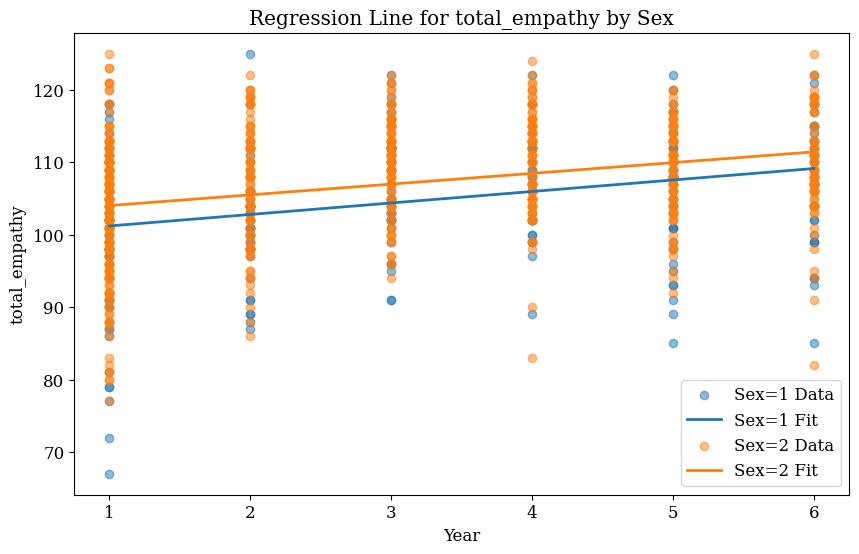

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


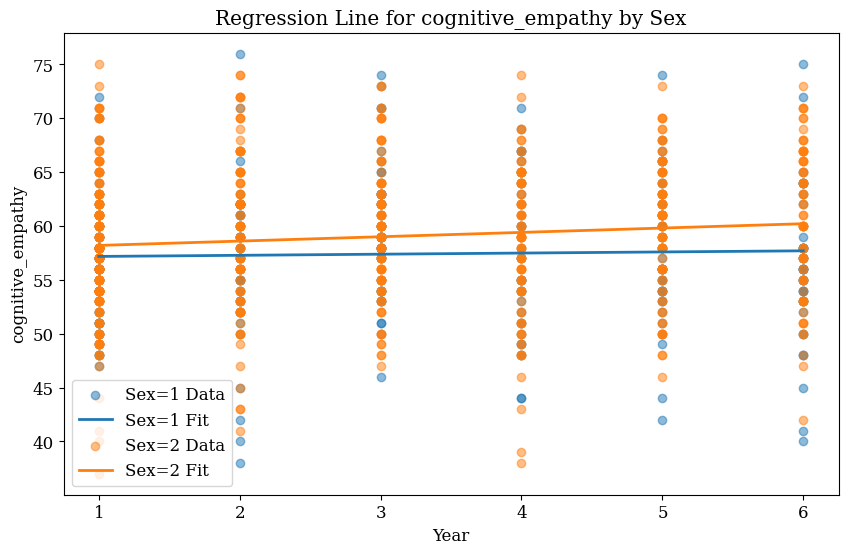

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


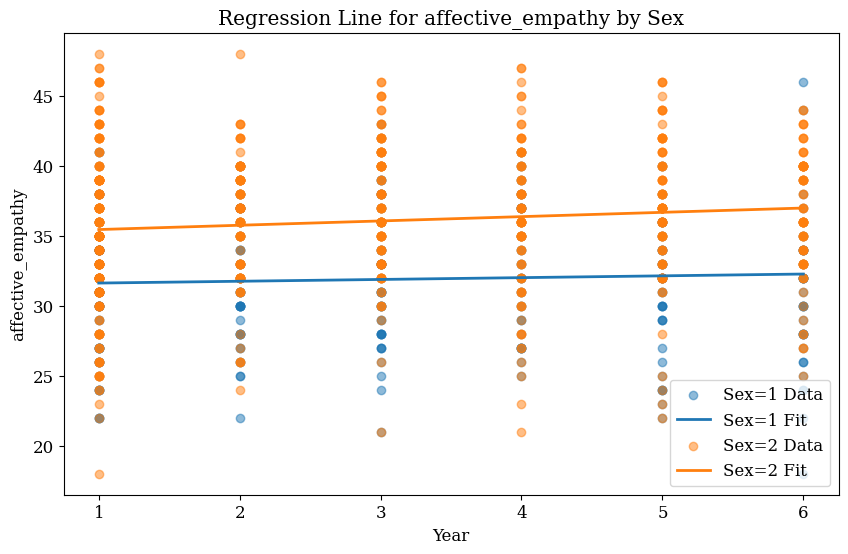

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


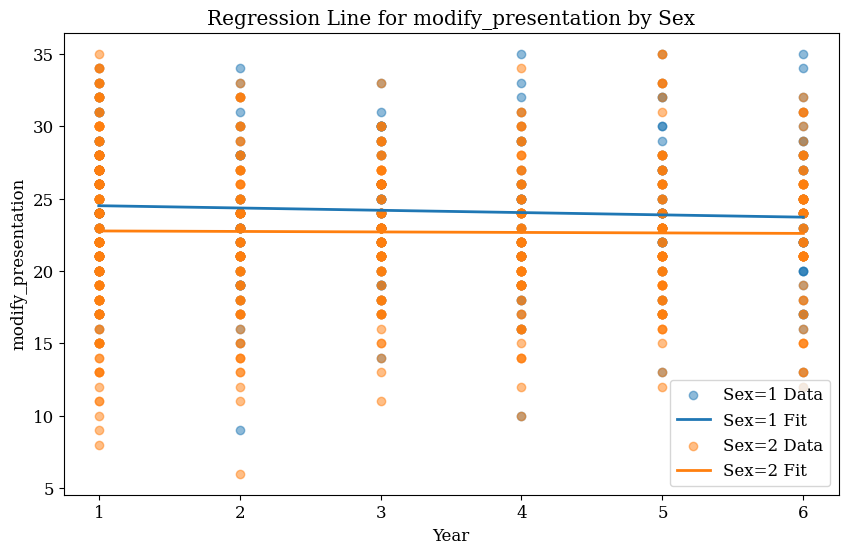

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


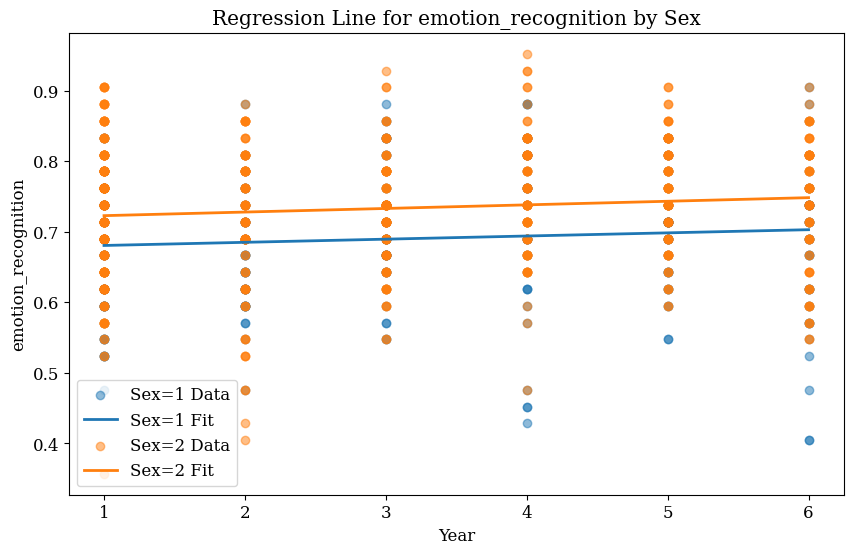

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


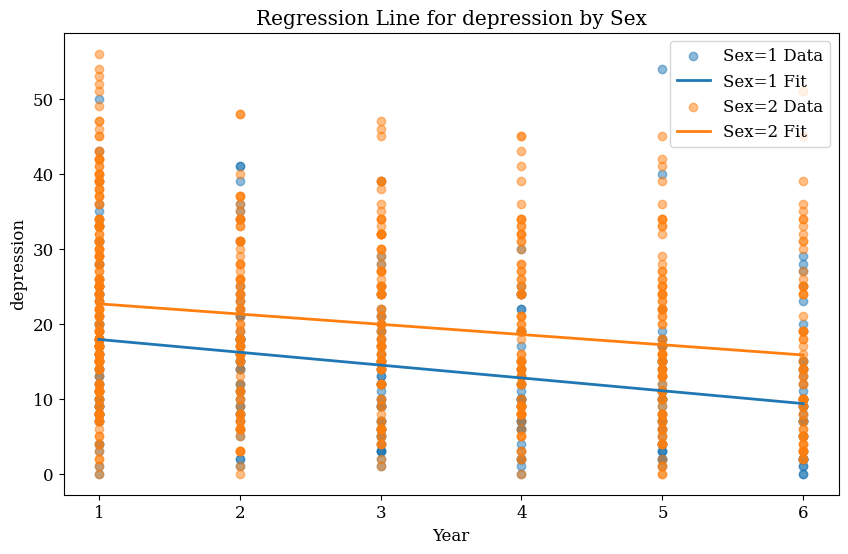

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


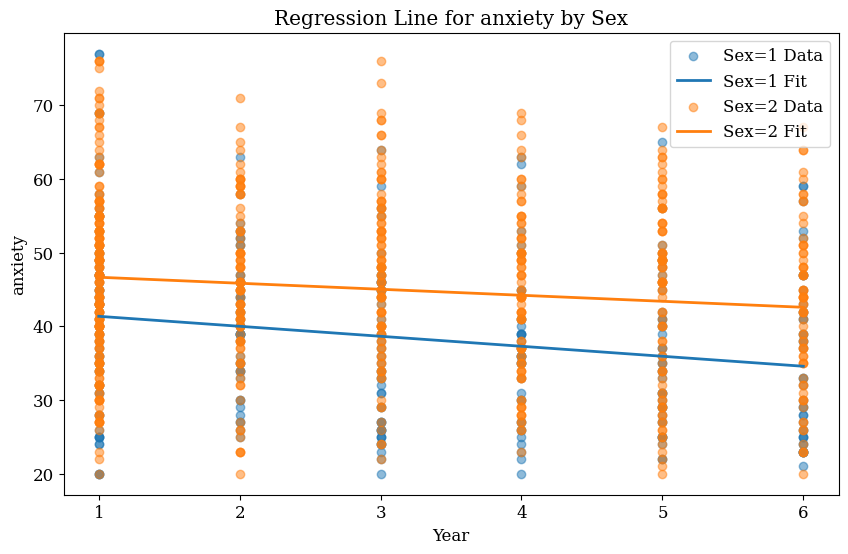

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


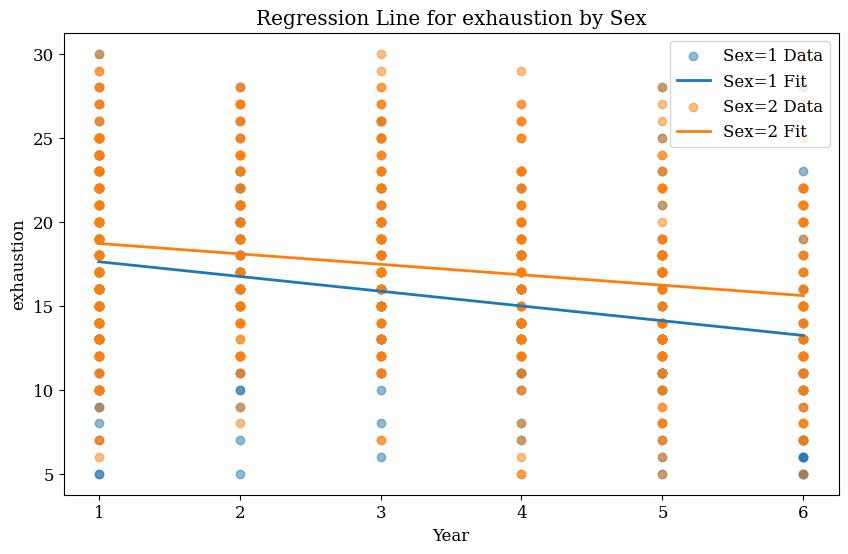

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


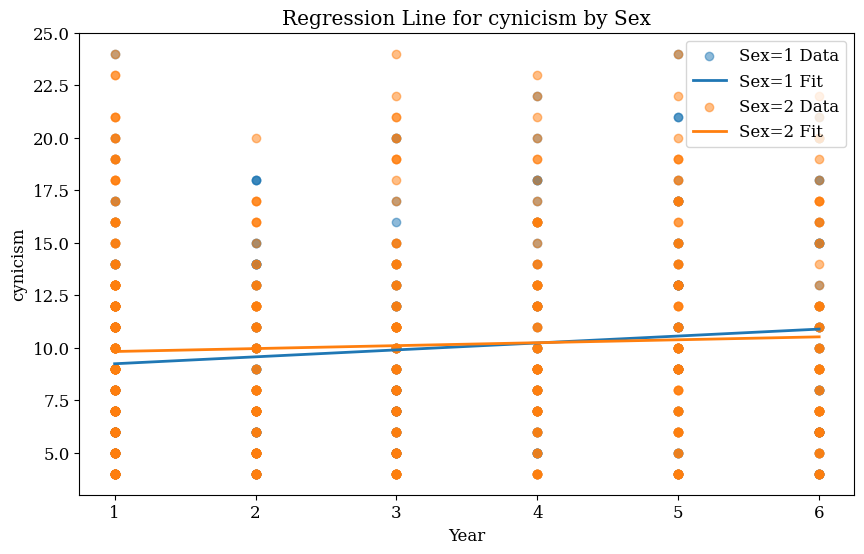

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


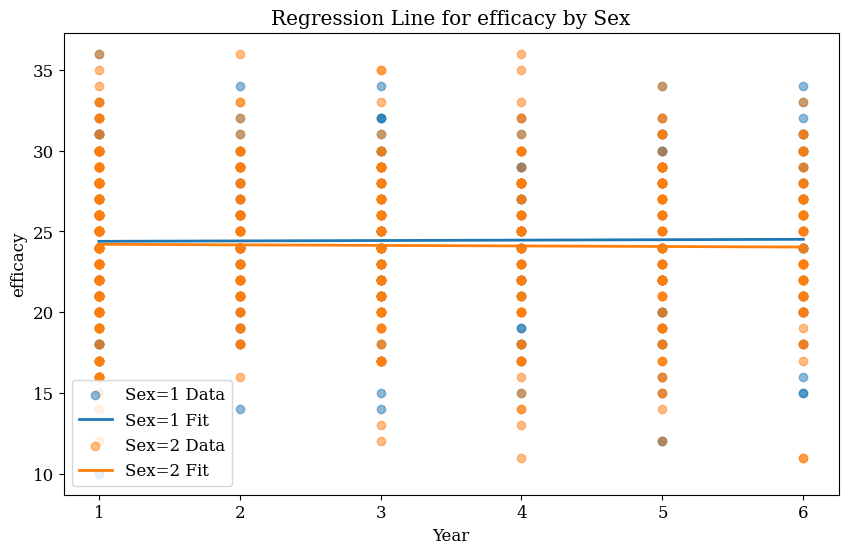

In [129]:
import matplotlib.pyplot as plt
import numpy as np

dependent_vars = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]
# Initialize a plot for each variable
for var in dependent_vars:
    plt.figure(figsize=(10, 6))

    # Plot for each sex
    for sex in [1, 2]:
        # Filter data by sex
        sex_df = df[df['sex'] == sex]

        # Fit the mixed-effects model
        model = smf.mixedlm(f"{var} ~ year", data=sex_df, groups=sex_df["id"])
        result = model.fit()

        # Extract the coefficients
        intercept = result.params['Intercept']
        slope = result.params['year']

        # Generate the line of best fit
        years = np.linspace(sex_df['year'].min(), sex_df['year'].max(), 100)
        predicted_values = intercept + slope * years

        # Plot the original data points
        plt.scatter(sex_df['year'], sex_df[var], alpha=0.5, label=f'Sex={sex} Data')

        # Plot the regression line
        plt.plot(years, predicted_values, label=f'Sex={sex} Fit', linewidth=2)

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel(var)
    plt.title(f'Regression Line for {var} by Sex')
    plt.legend()
    plt.show()


In [130]:
import statsmodels.genmod.generalized_estimating_equations as gee
from statsmodels.genmod.families import Gaussian

# GEE Model for each dependent variable by gender
for var in dependent_vars:
    for sex in [1, 2]:  # Loop over male and female
        # Filter data by sex
        sex_df = df[df['sex'] == sex]

        model = gee.GEE.from_formula(f"{var} ~ year", groups="id", data=sex_df, family=Gaussian())
        result = model.fit()
        print(f"GEE results for {var} (Sex={sex}):\n", result.summary())


GEE results for total_empathy (Sex=1):
                                GEE Regression Results                              
Dep. Variable:               total_empathy   No. Observations:                  275
Model:                                 GEE   No. clusters:                      275
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                   1
Family:                           Gaussian   Mean cluster size:                 1.0
Dependence structure:         Independence   Num. iterations:                     1
Date:                     Thu, 26 Sep 2024   Scale:                          77.920
Covariance type:                    robust   Time:                         09:55:11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.6272      1.305     76.338   

In [131]:
!pip install pygam

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


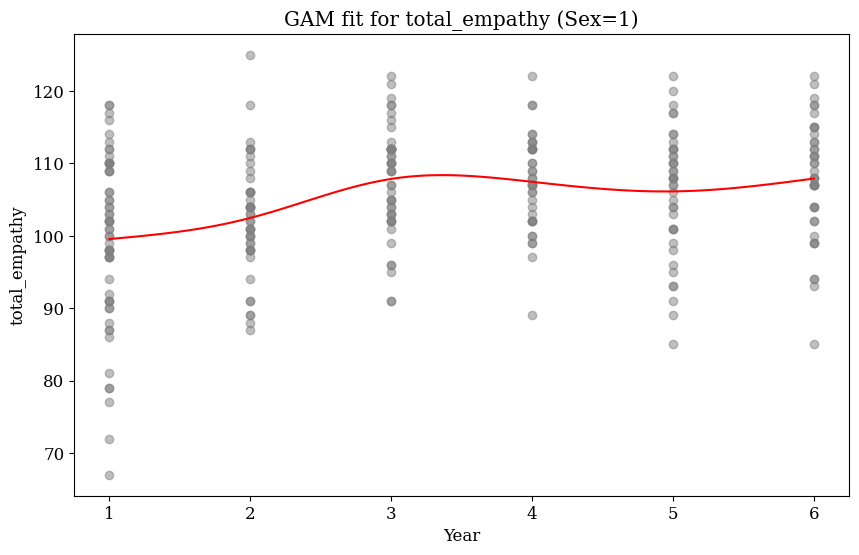

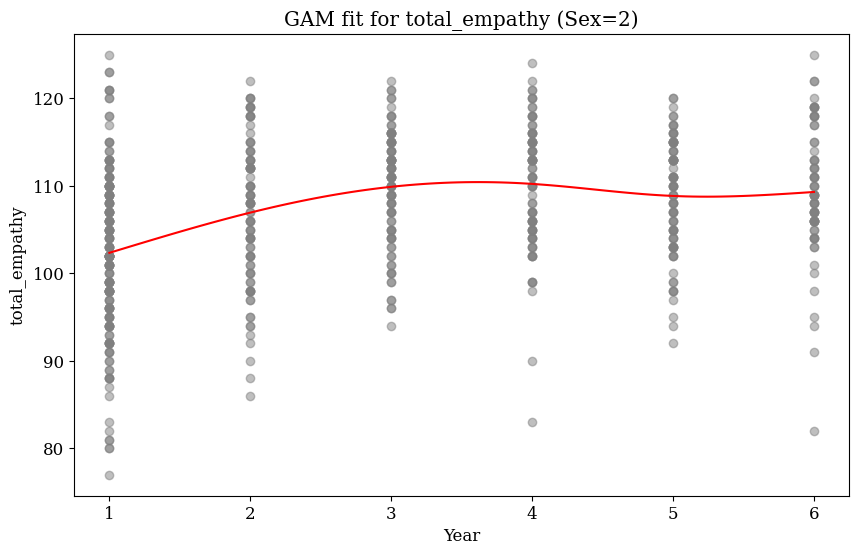

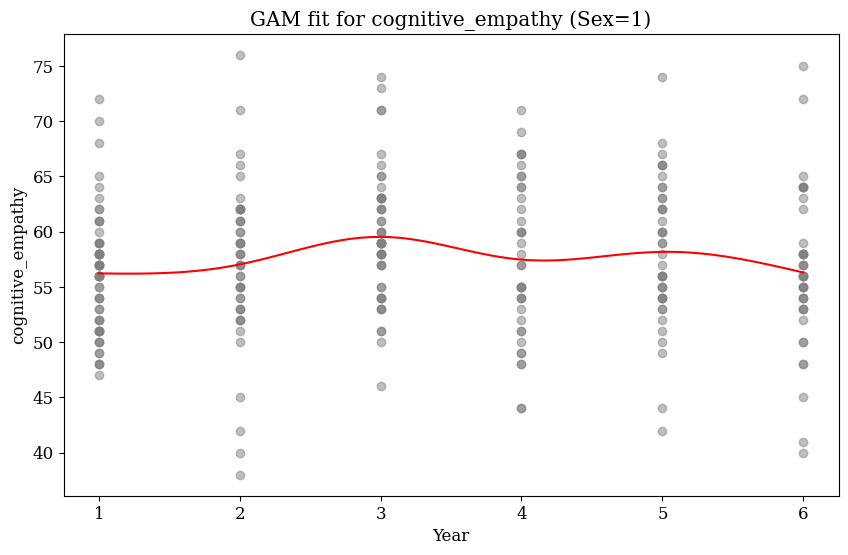

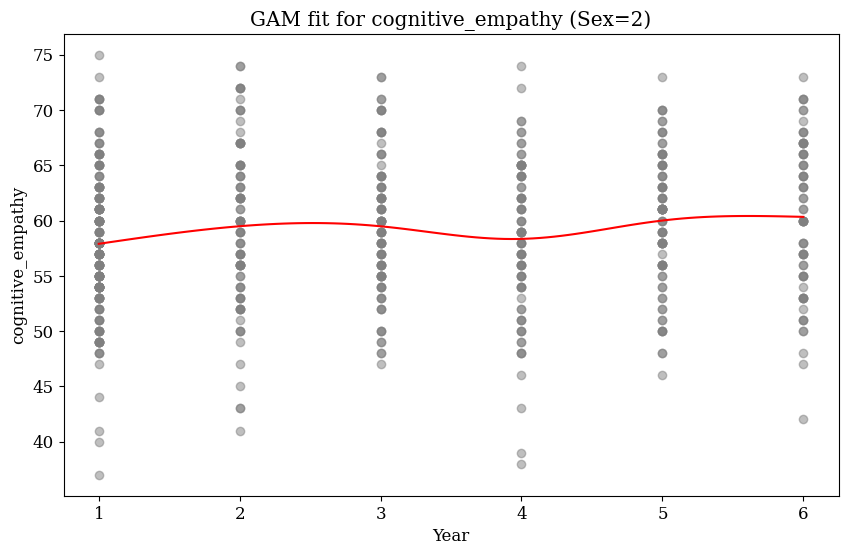

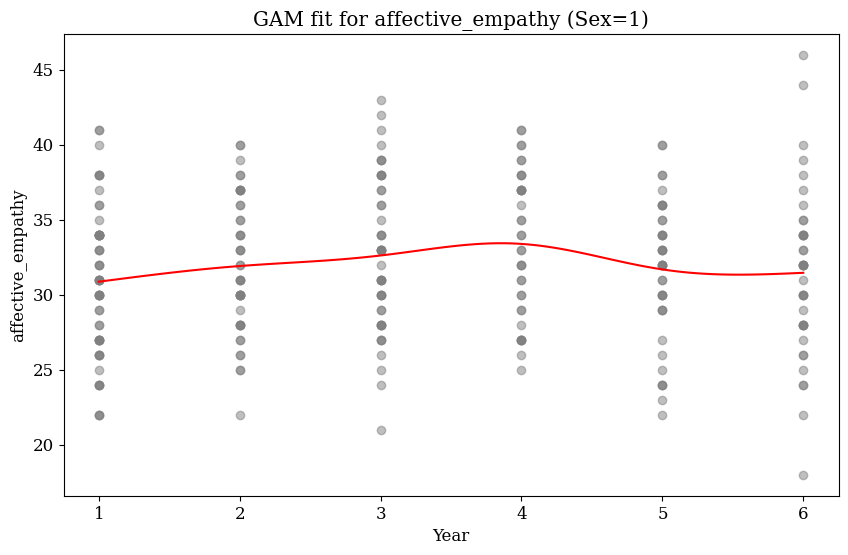

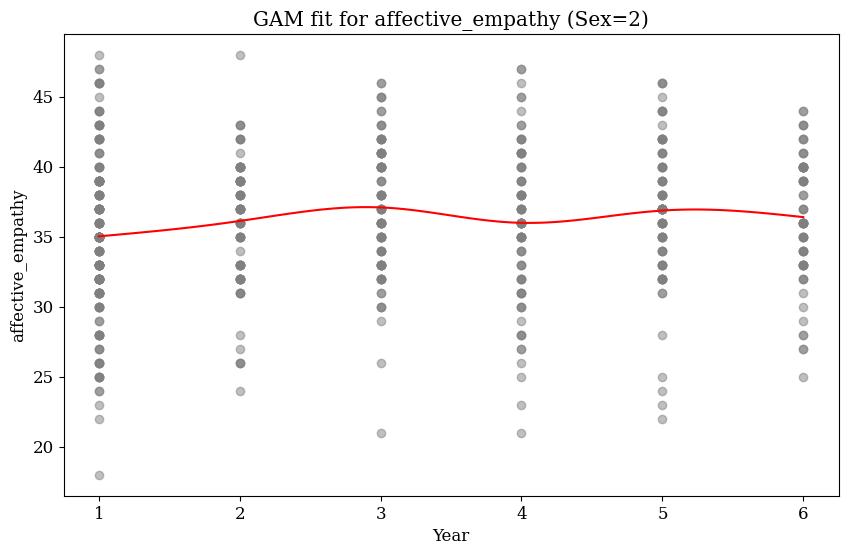

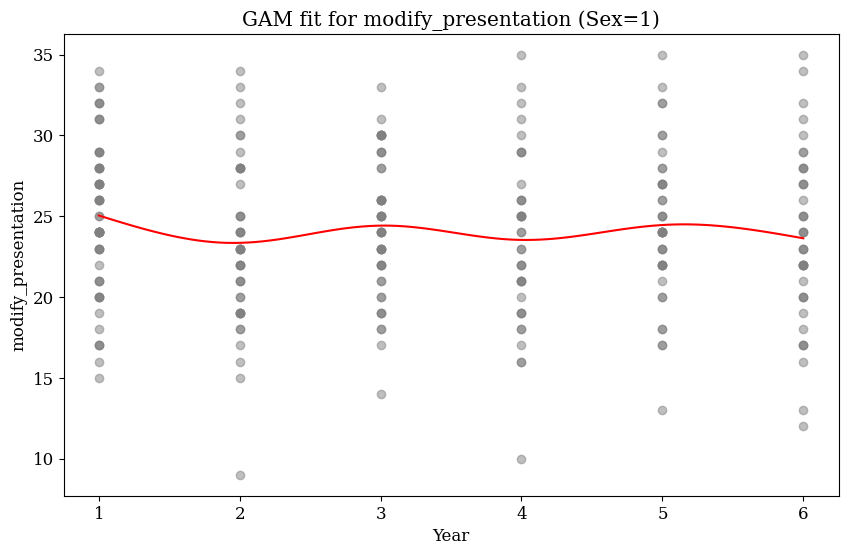

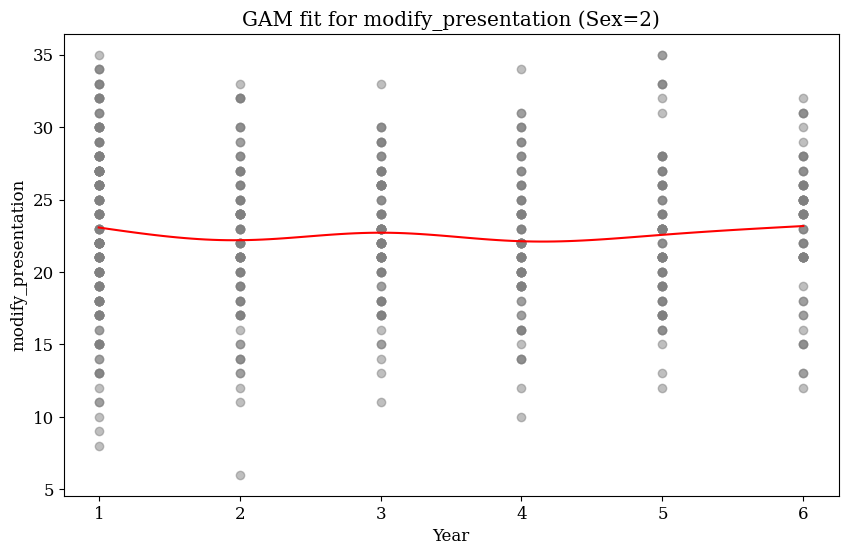

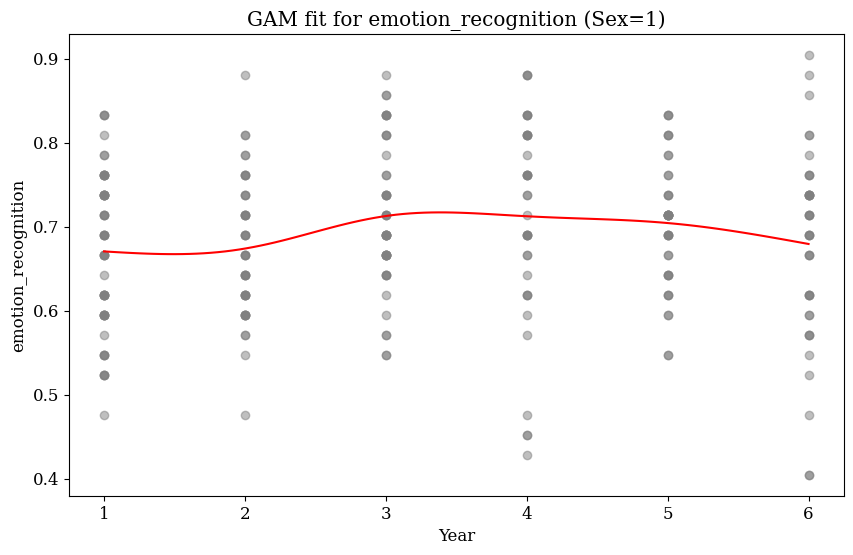

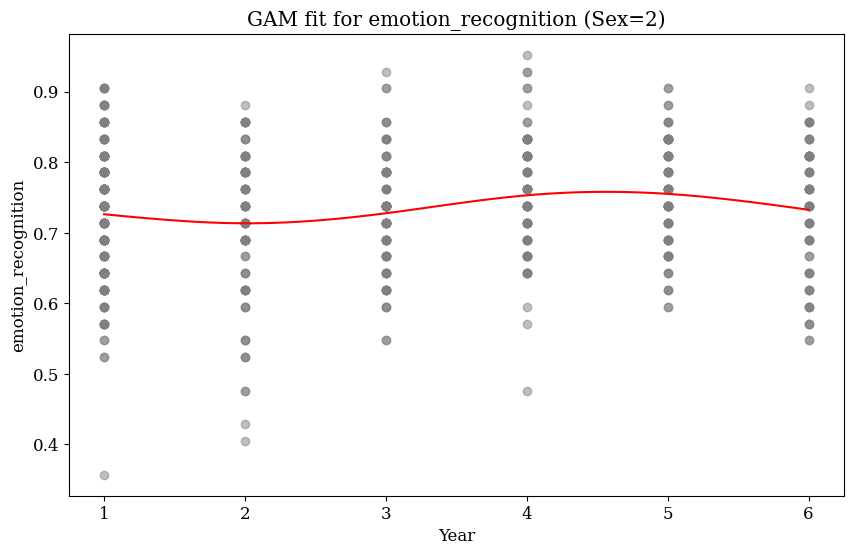

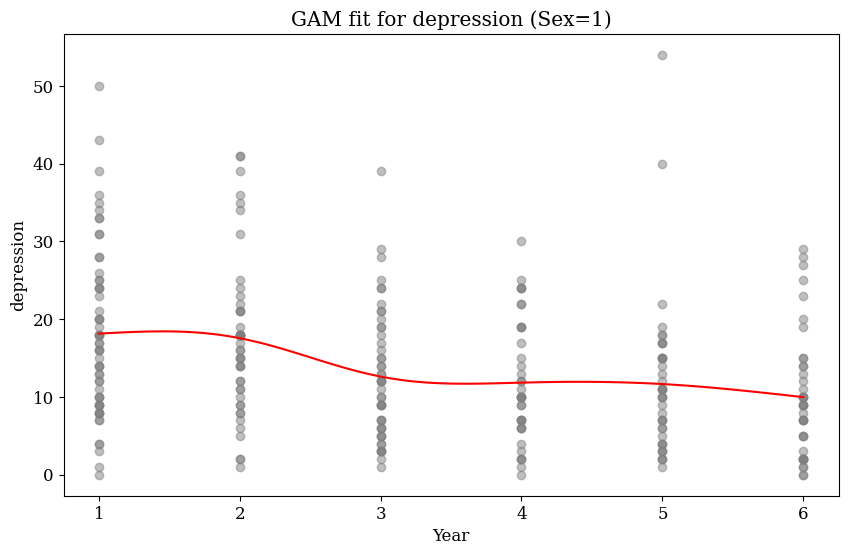

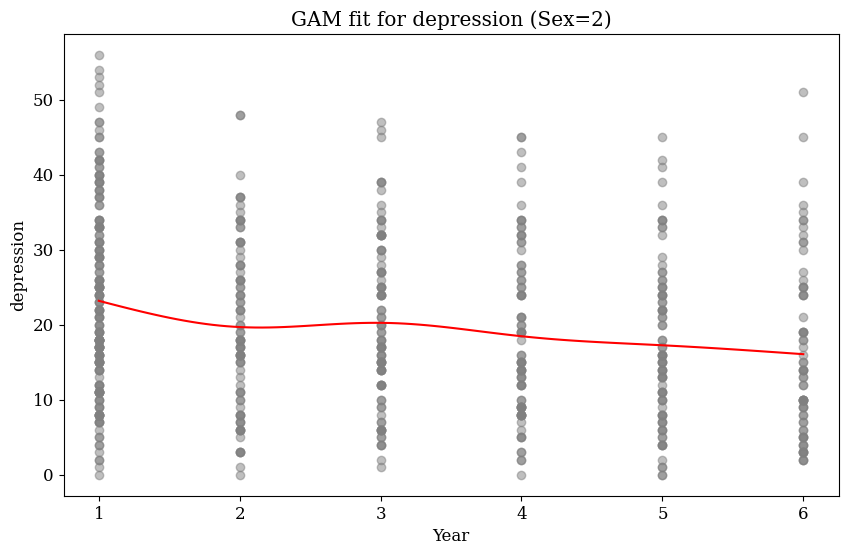

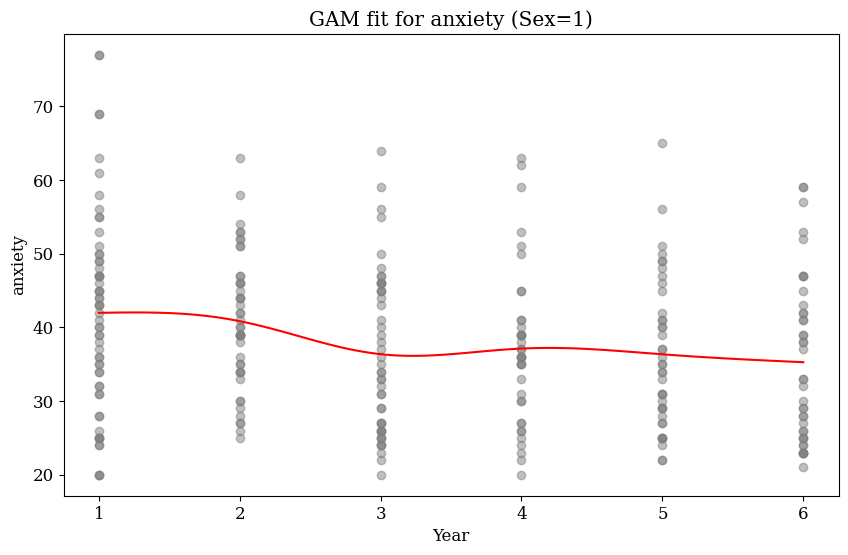

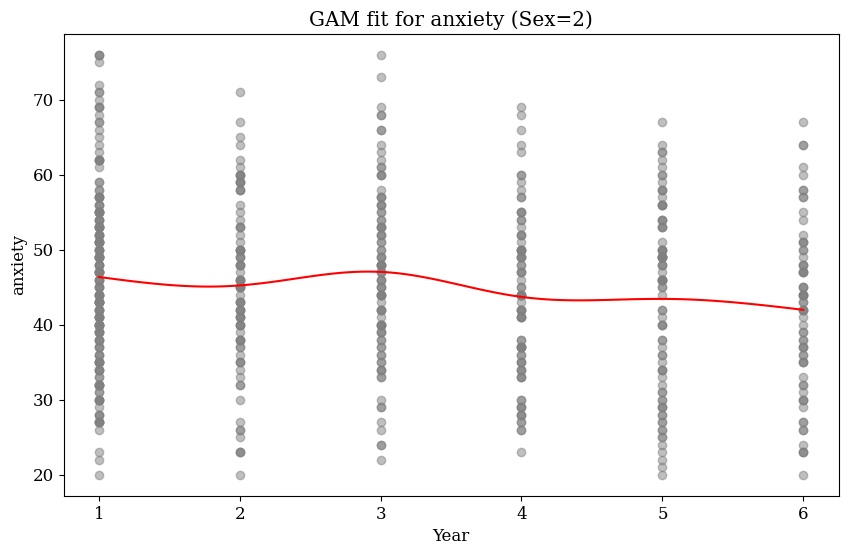

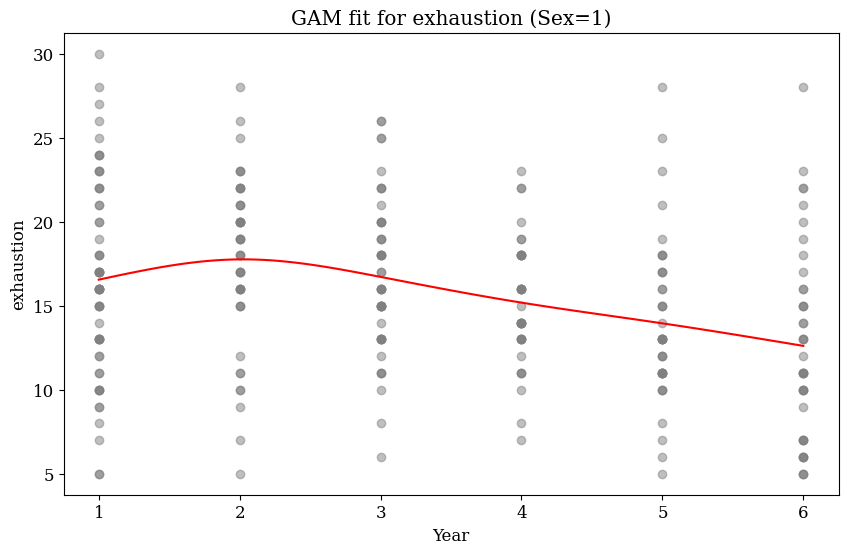

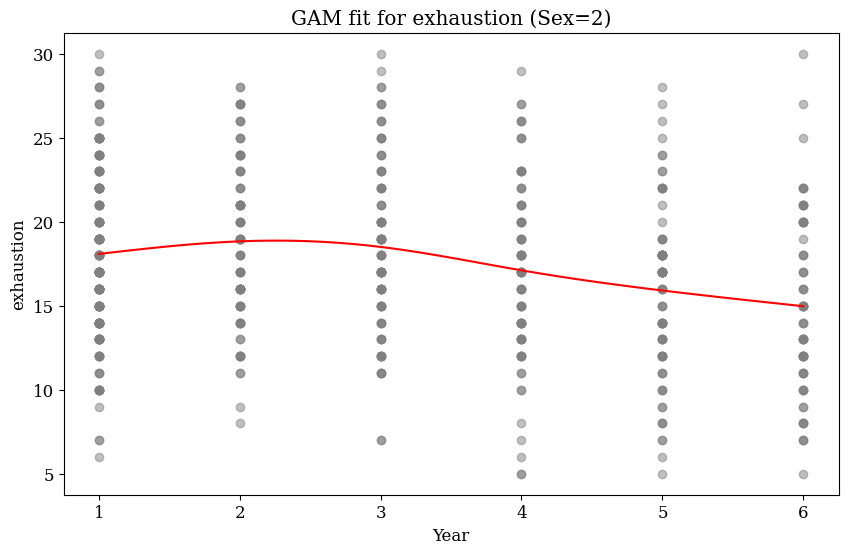

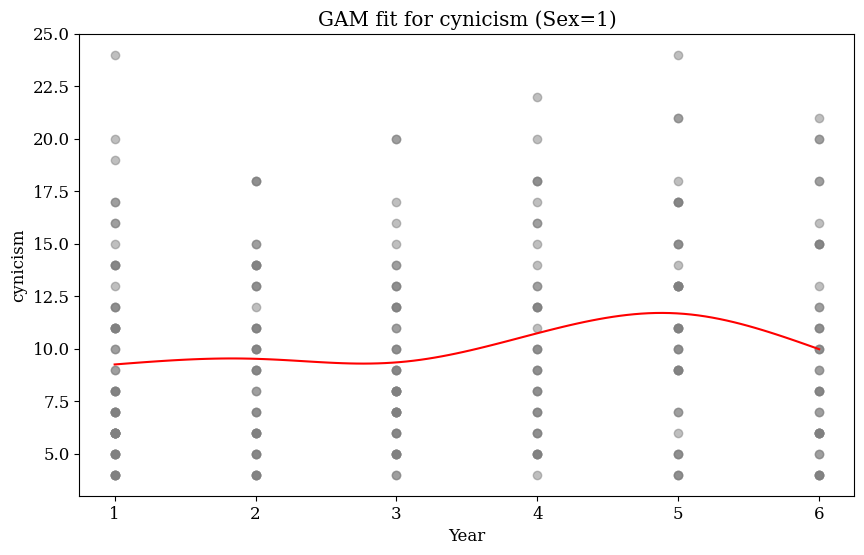

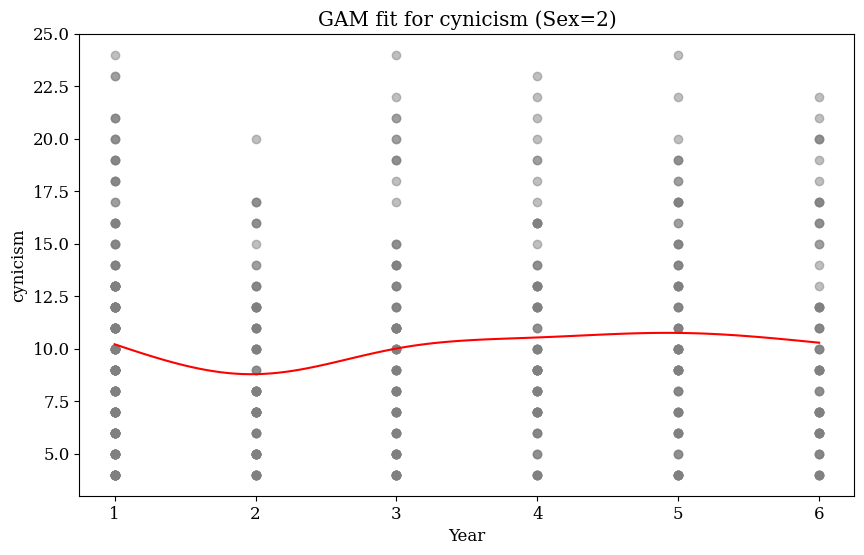

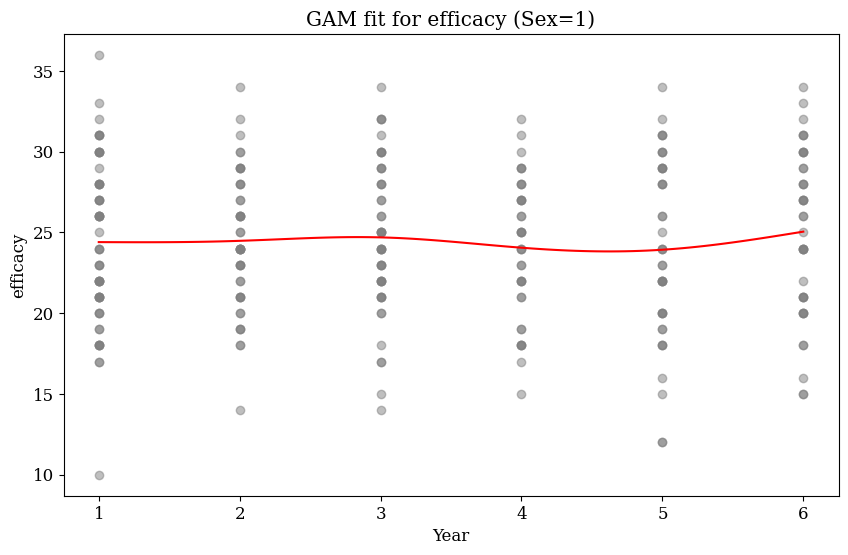

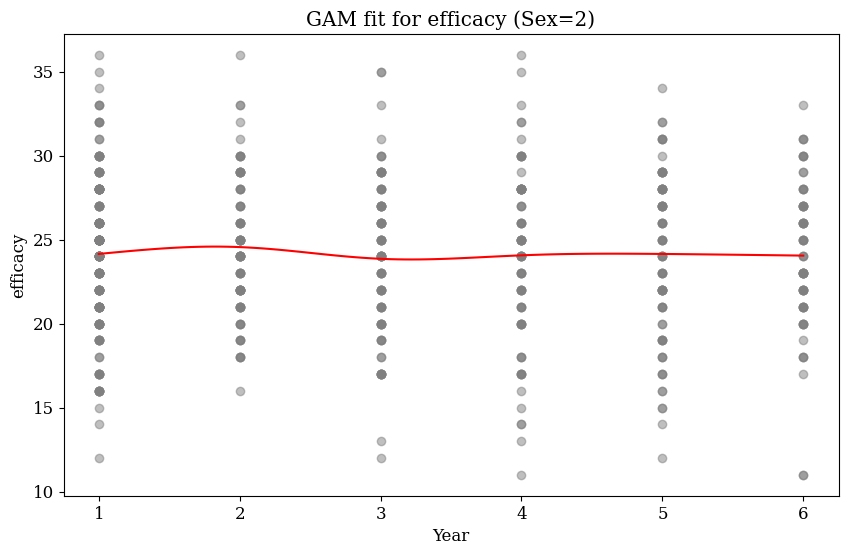

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

# Assuming df is your dataframe and dependent_vars is a list of your variables
# Example for one dependent variable, e.g., 'total_empathy'

for var in dependent_vars:
    for sex in [1, 2]:  # Loop over male and female
        # Filter data by sex
        sex_df = df[df['sex'] == sex]

        X = sex_df['year'].values.reshape(-1, 1)
        y = sex_df[var].values

        gam = LinearGAM(s(0)).fit(X, y)  # Using smoothing spline (s(0) refers to 'year')

        XX = np.linspace(X.min(), X.max(), 100)
        preds = gam.predict(XX)


        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='gray', alpha=0.5)
        plt.plot(XX, preds, color='red')
        plt.title(f"GAM fit for {var} (Sex={sex})")
        plt.xlabel('Year')
        plt.ylabel(var)
        plt.show()


In [133]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = input.copy()

# Independent variables: year and sex
X = df[['year', 'sex']]

# Encode sex as a categorical variable (optional, depends on the model)
X = pd.get_dummies(X, columns=['sex'], drop_first=True)

# List of dependent variables
dependent_vars = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df[dependent_vars], test_size=0.2, random_state=42)


In [135]:
# Random Forest
rf_results = {}
for var in dependent_vars:
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train[var])
    y_pred = rf.predict(X_test)
    rf_results[var] = {
        "RMSE": np.sqrt(mean_squared_error(y_test[var], y_pred)),
        "R2": r2_score(y_test[var], y_pred)
    }

print("Random Forest Results:")
for var, metrics in rf_results.items():
    print(f"{var}: RMSE={metrics['RMSE']}, R2={metrics['R2']}")


Random Forest Results:
total_empathy: RMSE=8.203510824720317, R2=0.14824202797492292
cognitive_empathy: RMSE=6.825757039510071, R2=0.03881748575849786
affective_empathy: RMSE=5.219834478094265, R2=0.1346543262863581
modify_presentation: RMSE=4.730165798845829, R2=0.02995116390762831
emotion_recognition: RMSE=0.09014580073807509, R2=0.0466218797941772
depression: RMSE=11.085419433344478, R2=0.06380997100126706
anxiety: RMSE=11.87404122326034, R2=0.08898035684393946
exhaustion: RMSE=5.343769387993188, R2=-0.0024899535230142877
cynicism: RMSE=4.608396422644971, R2=-0.029866997770045645
efficacy: RMSE=4.7127875057692625, R2=-0.00012682726223478547


In [136]:
# Gradient Boosting
gb_results = {}
for var in dependent_vars:
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb.fit(X_train, y_train[var])
    y_pred = gb.predict(X_test)
    gb_results[var] = {
        "RMSE": np.sqrt(mean_squared_error(y_test[var], y_pred)),
        "R2": r2_score(y_test[var], y_pred)
    }

print("Gradient Boosting Results:")
for var, metrics in gb_results.items():
    print(f"{var}: RMSE={metrics['RMSE']}, R2={metrics['R2']}")


Gradient Boosting Results:
total_empathy: RMSE=8.222635156570835, R2=0.14426609874717244
cognitive_empathy: RMSE=6.825547193255026, R2=0.038876584683171345
affective_empathy: RMSE=5.155124710417935, R2=0.1559765453552786
modify_presentation: RMSE=4.763465982999794, R2=0.016244874738567505
emotion_recognition: RMSE=0.09067104929693484, R2=0.03547950024726565
depression: RMSE=11.106794349636443, R2=0.06019616527702398
anxiety: RMSE=11.87727575745752, R2=0.08848395877960047
exhaustion: RMSE=5.3701839362870265, R2=-0.012425174977034104
cynicism: RMSE=4.673149061868845, R2=-0.05901167508935412
efficacy: RMSE=4.7127882587099235, R2=-0.0001271468337042947


In [137]:
# XGBoost
xgb_results = {}
for var in dependent_vars:
    xgb = XGBRegressor(n_estimators=100, random_state=42)
    xgb.fit(X_train, y_train[var])
    y_pred = xgb.predict(X_test)
    xgb_results[var] = {
        "RMSE": np.sqrt(mean_squared_error(y_test[var], y_pred)),
        "R2": r2_score(y_test[var], y_pred)
    }

print("XGBoost Results:")
for var, metrics in xgb_results.items():
    print(f"{var}: RMSE={metrics['RMSE']}, R2={metrics['R2']}")


XGBoost Results:
total_empathy: RMSE=8.220856708961264, R2=0.14463627338409424
cognitive_empathy: RMSE=6.832113776002888, R2=0.037026405334472656
affective_empathy: RMSE=5.192497488855145, R2=0.1436944603919983
modify_presentation: RMSE=4.764342014125856, R2=0.015883207321166992
emotion_recognition: RMSE=0.09082795883761222, R2=0.032138336301745785
depression: RMSE=11.117775710535499, R2=0.05833697319030762
anxiety: RMSE=11.882786904517218, R2=0.08763796091079712
exhaustion: RMSE=5.365753392000478, R2=-0.010755419731140137
cynicism: RMSE=4.64705435632506, R2=-0.047217607498168945
efficacy: RMSE=4.720803845967395, R2=-0.0035320520401000977


# **Regression of curriculum years and gender as independent variables and each of the empathy, mental health, and burnout indicators separately as dependent variables**

In [138]:
# Define a function to run and print linear regression results
def run_regression(df, dependent_var):
    formula = f"{dependent_var} ~ year + sex"
    model = ols(formula, data=df).fit()
    print(f"\nResults for {dependent_var}:")
    print(model.summary())

# List of dependent variables
dependent_vars = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]

# Run regressions for each dependent variable
for var in dependent_vars:
    run_regression(input, var)


Results for total_empathy:
                            OLS Regression Results                            
Dep. Variable:          total_empathy   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     55.26
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           2.45e-23
Time:                        09:55:19   Log-Likelihood:                -3129.7
No. Observations:                 886   AIC:                             6265.
Df Residuals:                     883   BIC:                             6280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.0732   

In [139]:
import pandas as pd
from statsmodels.formula.api import ols

# Define a function to run and print linear regression results
def run_regression(df, dependent_var, sex_value):
    filtered_df = df[df['sex'] == sex_value]
    formula = f"{dependent_var} ~ year"
    model = ols(formula, data=filtered_df).fit()
    sex_label = 'Male' if sex_value == 1 else 'Female'
    print(f"\nResults for {dependent_var} ({sex_label}):")
    print(model.summary())

# List of dependent variables
dependent_vars = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]

# Run regressions for each dependent variable for both males and females
for var in dependent_vars:
    run_regression(input, var, sex_value=1)  # For males
    run_regression(input, var, sex_value=2)  # For females



Results for total_empathy (Male):
                            OLS Regression Results                            
Dep. Variable:          total_empathy   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     27.01
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           3.98e-07
Time:                        09:55:19   Log-Likelihood:                -988.11
No. Observations:                 275   AIC:                             1980.
Df Residuals:                     273   BIC:                             1987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.

In [140]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

# Define a function to run and print linear regression results
def run_regression(df, dependent_var, sex_value):
    filtered_df = df.loc[df['sex'] == sex_value].copy()

    # Standardize the 'year' column and the dependent variable
    scaler = StandardScaler()
    filtered_df['year'] = scaler.fit_transform(filtered_df[['year']])
    filtered_df[dependent_var] = scaler.fit_transform(filtered_df[[dependent_var]])

    # Define the formula and fit the model
    formula = f"{dependent_var} ~ year"
    model = ols(formula, data=filtered_df).fit()

    # Print the summary
    sex_label = 'Male' if sex_value == 1 else 'Female'
    print(f"\nResults for {dependent_var} ({sex_label}):")
    print(model.summary())

# List of dependent variables
dependent_vars = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]
df=input
# Run regressions for each dependent variable for both males and females
for var in dependent_vars:
    run_regression(df, var, sex_value=1)  # For males
    run_regression(df, var, sex_value=2)  # For females



Results for total_empathy (Male):
                            OLS Regression Results                            
Dep. Variable:          total_empathy   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     27.01
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           3.98e-07
Time:                        09:55:19   Log-Likelihood:                -377.24
No. Observations:                 275   AIC:                             758.5
Df Residuals:                     273   BIC:                             765.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.471

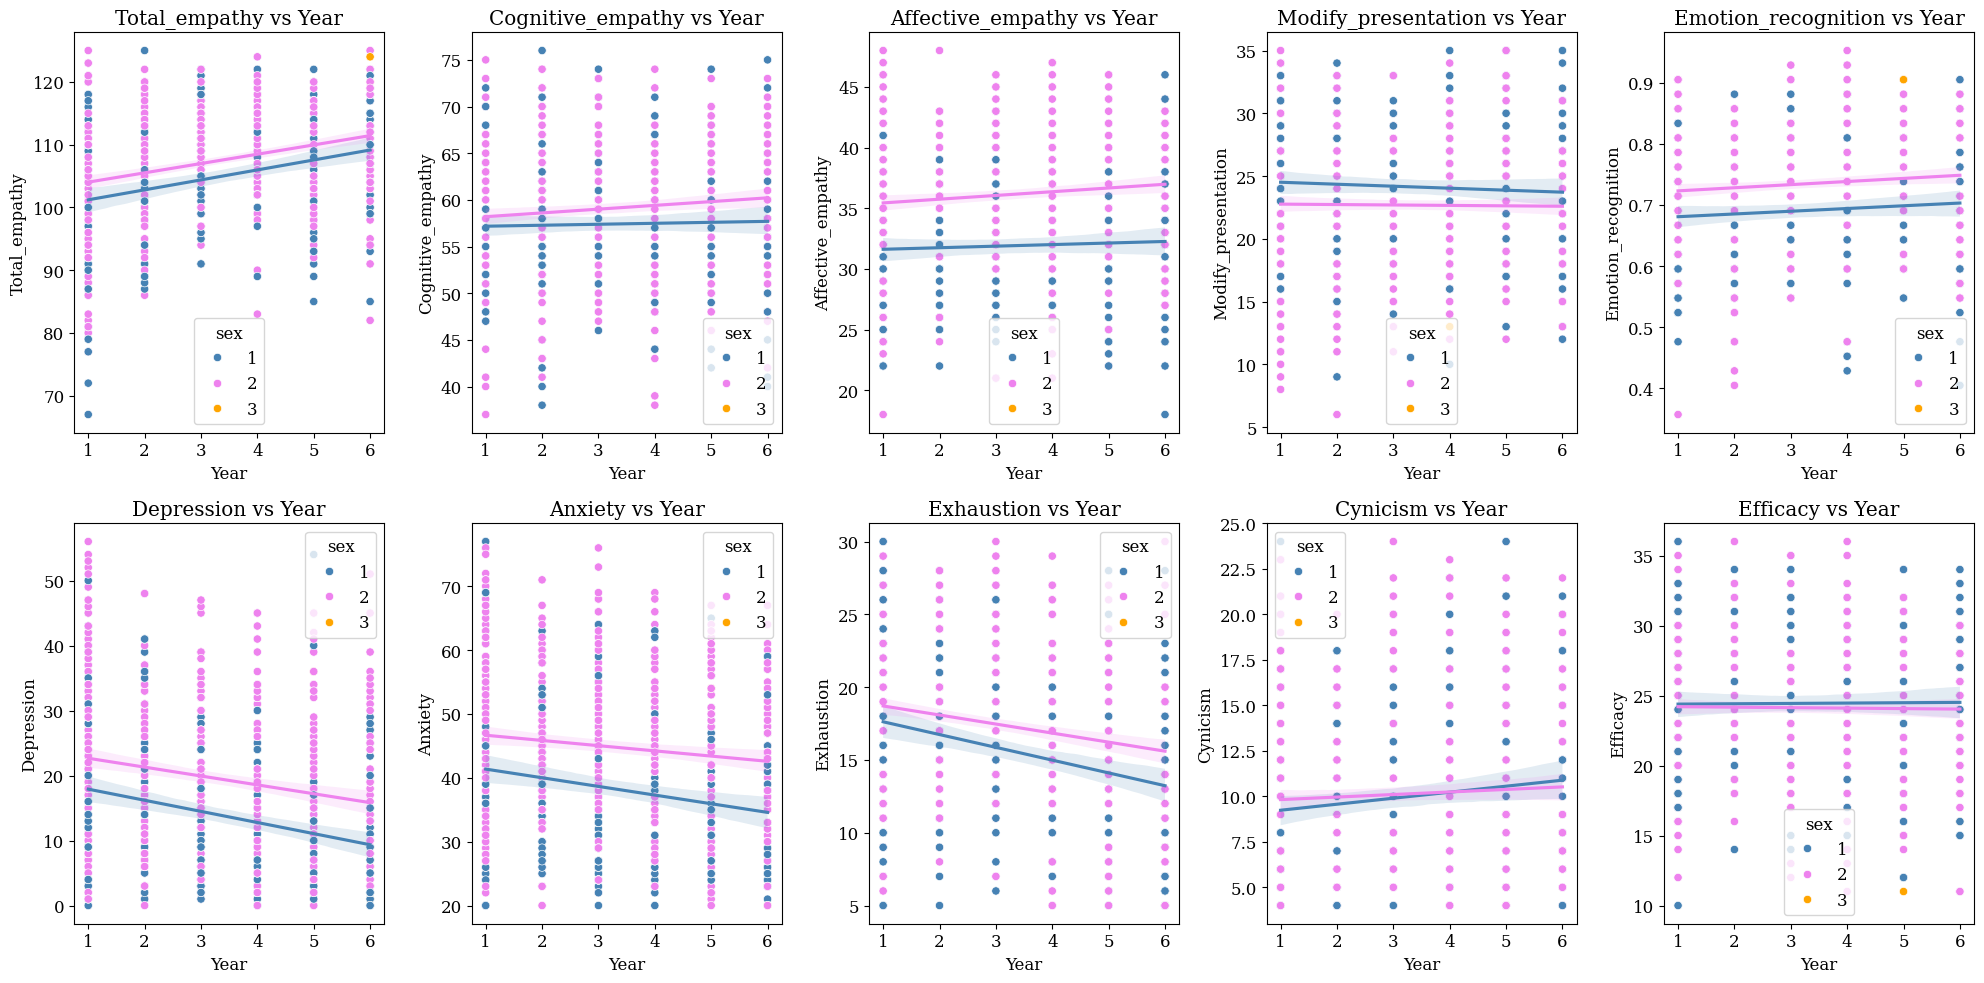

In [141]:
def plot_regression(ax, df, dependent_var):
    sns.scatterplot(ax=ax, x='year', y=dependent_var, hue='sex', data=df, palette={1: "steelblue", 2: "violet", 3: "orange"})
    sns.regplot(ax=ax, x='year', y=dependent_var, data=df[df['sex'] == 1], scatter=False, color="steelblue")
    sns.regplot(ax=ax, x='year', y=dependent_var, data=df[df['sex'] == 2], scatter=False, color="violet")
    ax.set_title(f'{dependent_var.capitalize()} vs Year')
    ax.set_xlabel('Year')
    ax.set_ylabel(dependent_var.capitalize())

# Create a 2x5 grid for plots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create regression plots in each subplot
for ax, var in zip(axes, dependent_vars):
    plot_regression(ax, input, var)

# Adjust layout
plt.tight_layout()
plt.show()

In [145]:
import pandas as pd
from scipy.stats import linregress

# Assuming df is your input DataFrame and dependent_vars is your list of variables
df = input  # Replace this with your actual DataFrame
dependent_vars = [   'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy']  # Replace with your actual dependent variable names

# Initialize a list to store the results
results = []

# Filter data for sex = 1 (Male)
df_sex1 = df[df['sex'] == 1]

# Filter data for sex = 2 (Female)
df_sex2 = df[df['sex'] == 2]

# Calculate regression for each dependent variable
for var in dependent_vars:
    # Regression for males
    slope_male, intercept_male, r_value_male, p_value_male, std_err_male = linregress(df_sex1['year'], df_sex1[var])
    
    # Regression for females
    slope_female, intercept_female, r_value_female, p_value_female, std_err_female = linregress(df_sex2['year'], df_sex2[var])
    
    # Append results as a dictionary to the list
    results.append({
        'Variable': var,
        'Slope [Male]': slope_male,
        'Intercept [Male]': intercept_male,
        'R-value [Male]': r_value_male,
        'P-value [Male]': p_value_male,
        'Std Err [Male]': std_err_male,
        'Slope [Female]': slope_female,
        'Intercept [Female]': intercept_female,
        'R-value [Female]': r_value_female,
        'P-value [Female]': p_value_female,
        'Std Err [Female]': std_err_female
    })

# Create a DataFrame to display the results
result_df = pd.DataFrame(results)

# Display the result table
print(result_df)



              Variable  Slope [Male]  Intercept [Male]  R-value [Male]  \
0        total_empathy      1.587044         99.627223        0.300026   
1    cognitive_empathy      0.104233         57.072663        0.027996   
2    affective_empathy      0.128938         31.489810        0.045937   
3  modify_presentation     -0.158240         24.664482       -0.057378   
4  emotion_recognition      0.004471          0.676158        0.081732   
5           depression     -1.710811         19.615097       -0.304633   
6              anxiety     -1.356172         42.720970       -0.208532   
7           exhaustion     -0.878100         18.498350       -0.291733   
8             cynicism      0.330173          8.906122        0.125668   
9             efficacy      0.024945         24.361817        0.009091   

   P-value [Male]  Std Err [Male]  Slope [Female]  Intercept [Female]  \
0    3.978537e-07        0.305398        1.482724          102.546251   
1    6.439139e-01        0.225247      

In [66]:
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

# Create dummy variables for 'year', with Bmed1 (year=1) as the reference category
data = pd.get_dummies(input, columns=['year'], drop_first=True)
data = pd.get_dummies(data, columns=['sex'])

# List of dependent variables
dependent_vars = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]

# List of independent variables
independent_vars = ['year_2', 'year_3', 'year_4', 'year_5', 'year_6',  'sex_2', 'sex_3']

# Standardize the independent variables
scaler = StandardScaler()
data[independent_vars] = scaler.fit_transform(data[independent_vars])

# Loop through each dependent variable and fit a regression model
for dependent_var in dependent_vars:
    # Standardize the dependent variable
    data[dependent_var] = scaler.fit_transform(data[[dependent_var]])
    # Define the formula for the regression model
    formula = f'{dependent_var} ~ year_2 + year_3 + year_4 + year_5 + year_6  + sex_2 + sex_3'

    # Fit the regression model
    model = ols(formula, data=data).fit()

    # Print the summary of the regression model
    print(f'Results for {dependent_var}:\n')
    print(model.summary())
    print('\n' + '-'*80 + '\n')

# Predict the values using the fitted model
data['predicted_empathy'] = model.fittedvalues


Results for total_empathy:

                            OLS Regression Results                            
Dep. Variable:          total_empathy   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     23.14
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           6.28e-29
Time:                        18:49:11   Log-Likelihood:                -1182.2
No. Observations:                 886   AIC:                             2380.
Df Residuals:                     878   BIC:                             2419.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.325e-16   

In [67]:
# Create dummy variables for 'year', with Bmed1 (year=1) as the reference category
data = pd.get_dummies(input, columns=['year'], drop_first=True)
# List of dependent variables
dependent_vars = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]

# List of independent variables
independent_vars = ['year_2', 'year_3', 'year_4', 'year_5', 'year_6', 'sex']

# Standardize the independent variables
scaler = StandardScaler()
data[independent_vars] = scaler.fit_transform(data[independent_vars])

# Loop through each dependent variable and fit a regression model
for dependent_var in dependent_vars:
    # Standardize the dependent variable
    data[dependent_var] = scaler.fit_transform(data[[dependent_var]])
    # Define the formula for the regression model
    formula = f'{dependent_var} ~ year_2 + year_3 + year_4 + year_5 + year_6 + sex'

    # Fit the regression model
    model = ols(formula, data=data).fit()

    # Print the summary of the regression model
    print(f'Results for {dependent_var}:\n')
    print(model.summary())
    print('\n' + '-'*80 + '\n')

# Predict the values using the fitted model
data['predicted_empathy'] = model.fittedvalues


Results for total_empathy:

                            OLS Regression Results                            
Dep. Variable:          total_empathy   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     26.90
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.58e-29
Time:                        18:49:12   Log-Likelihood:                -1182.5
No. Observations:                 886   AIC:                             2379.
Df Residuals:                     879   BIC:                             2412.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.325e-16   

In [68]:
from statsmodels.regression.mixed_linear_model import MixedLM
df=input
Outcome = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]
model = MixedLM.from_formula("total_empathy ~ year + sex", groups="id", data=df)
result = model.fit()
print(result.summary())


           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: total_empathy
No. Observations: 886     Method:             REML         
No. Groups:       886     Scale:              34.3658      
Min. group size:  1       Log-Likelihood:     -3130.5553   
Max. group size:  1       Converged:          Yes          
Mean group size:  1.0                                      
------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept   97.073     0.518  187.570  0.000  96.059  98.088
year         1.541     0.152   10.103  0.000   1.242   1.840
sex          2.667     0.393    6.793  0.000   1.897   3.436
id Var      34.366                                          



C:\Users\User\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


Tried to emulate Table 2 of original paper. (Did not understand anything:)

In [69]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm

# Assume data is already loaded into a DataFrame called `data`
# Ensure 'year' column is correctly handled (create dummy variables if needed)
data = pd.get_dummies(input, columns=['year'], drop_first=True)

# List of independent variables
independent_vars = ['year_2', 'year_3', 'year_4', 'year_5', 'year_6', 'sex']

# Standardize the independent variables
scaler = StandardScaler()
data[independent_vars] = scaler.fit_transform(data[independent_vars])

# List of dependent variables
dependent_vars = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]

# Store results
results = []

# Loop through each dependent variable
for dependent_var in dependent_vars:
    # Standardize the dependent variable
    data[dependent_var] = scaler.fit_transform(data[[dependent_var]])

    # Define the formula for the regression model
    formula = f'{dependent_var} ~ year_2 + year_3 + year_4 + year_5 + year_6 + sex '

    # Fit the regression model
    model = ols(formula, data=data).fit()
    print(model.summary())

    # Get standardized beta coefficients
    beta_coefficients = model.params
    se = model.bse

    # Perform ANOVA to calculate eta squared
    anova_results = anova_lm(model)
    eta_squared = anova_results['sum_sq'][:-1] / anova_results['sum_sq'].sum()

    # Store the results
    results.append({
        'Dependent Variable': dependent_var,
        'Beta Coefficients': beta_coefficients,
        'Standard Errors': se,
        'Eta Squared': eta_squared
    })

# Display the results
for result in results:
    print(f"Results for {result['Dependent Variable']}:")
    print(f"Beta Coefficients:\n{result['Beta Coefficients']}")
    print(f"Standard Errors:\n{result['Standard Errors']}")
    print(f"Eta Squared:\n{result['Eta Squared']}")
    print('\n' + '-'*80 + '\n')


                            OLS Regression Results                            
Dep. Variable:          total_empathy   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     26.90
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.58e-29
Time:                        18:49:13   Log-Likelihood:                -1182.5
No. Observations:                 886   AIC:                             2379.
Df Residuals:                     879   BIC:                             2412.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.325e-16      0.031  -2.36e-14      1.0

In [70]:
# List of dependent variables
dependent_vars = [
    'total_empathy', 'cognitive_empathy', 'affective_empathy',
    'modify_presentation', 'emotion_recognition', 'depression',
    'anxiety', 'exhaustion', 'cynicism', 'efficacy'
]

# Run regressions for each dependent variable(y) where xi is independent variable
# y= ko + k1x1 + k2x2 + ...... + knxn + ϵ
for var in dependent_vars:
  model = sm.OLS(input[var], sm.add_constant(input[['year', 'sex']])).fit()
  print(f"\nResults for {var}:")
  print(model.summary())


Results for total_empathy:
                            OLS Regression Results                            
Dep. Variable:          total_empathy   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     55.26
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.45e-23
Time:                        18:49:14   Log-Likelihood:                -3129.7
No. Observations:                 886   AIC:                             6265.
Df Residuals:                     883   BIC:                             6280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.0732   

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df=input
X1 = df[['year', 'sex']]

for var in dependent_vars:
  y = df[var]

  # Initialize the models
  model1 = LinearRegression().fit(X1, y)
  print(f'Model 1 Coefficients: {model1.coef_}, Intercept: {model1.intercept_}')

Model 1 Coefficients: [1.54072636 2.66689235], Intercept: 97.07321773122186
Model 1 Coefficients: [0.31119883 1.67490807], Intercept: 54.72099602901035
Model 1 Coefficients: [0.25070673 4.13408475], Intercept: 26.99820757839513
Model 1 Coefficients: [-0.06000656 -1.38582741], Intercept: 25.685632977529263
Model 1 Coefficients: [0.00490718 0.04276669], Intercept: 0.6324178458364744
Model 1 Coefficients: [-1.49519528  5.23726988], Intercept: 13.811413619983226
Model 1 Coefficients: [-1.02358153  6.1314355 ], Intercept: 35.67992043960874
Model 1 Coefficients: [-0.7031129   1.57985171], Intercept: 16.381399655400806
Model 1 Coefficients: [0.20461046 0.2274955 ], Intercept: 9.058496172000591
Model 1 Coefficients: [-0.03353994 -0.43670551], Intercept: 25.052068795212733


# **Linear regressions in which each of the empathy indicators are considered separately as independent variables with each of the mental health and burnout indicators as dependent variables**

In [72]:
import statsmodels.api as sm

# Define the indicators
empathy_indicators = ['total_empathy', 'cognitive_empathy', 'affective_empathy', 'modify_presentation', 'emotion_recognition']
mental_health_indicators = ['depression', 'anxiety', 'exhaustion', 'cynicism']
burnout_indicators = ['efficacy']
dependent_vars = mental_health_indicators + burnout_indicators

# Filter data for males
df_males = input[input['sex'] == 1]

# Filter data for females
df_females = input[input['sex'] == 2]

# Function to fit and summarize OLS models
def fit_and_summarize_ols(df, empathy_indicators, dependent_vars, sex_label):
    results = {}
    for ind in empathy_indicators:
        for var in dependent_vars:
            X = sm.add_constant(df[ind])
            y = df[var]
            model = sm.OLS(y, X).fit()
            results[(ind, var)] = model.params
            print(f"\nResults for {var} [Sex: {sex_label}, Empathy Indicator: {ind}]:")
            print(model.summary())
    return results

# Fit models for males and females
print("Fitting models for males...")
results_males = fit_and_summarize_ols(df_males, empathy_indicators, dependent_vars, 'Male')

print("\nFitting models for females...")
results_females = fit_and_summarize_ols(df_females, empathy_indicators, dependent_vars, 'Female')

# Comparing coefficients
comparison_results = []
for key in results_males:
    male_coeff = results_males[key]
    female_coeff = results_females[key]
    comparison_results.append((key[0], key[1], male_coeff[1], female_coeff[1]))

# Display comparison results
comparison_df = pd.DataFrame(comparison_results, columns=['Empathy Indicator', 'Dependent Variable', 'Male Coefficient', 'Female Coefficient'])
print("\nComparison of Coefficients:")
print(comparison_df)




Fitting models for males...

Results for depression [Sex: Male, Empathy Indicator: total_empathy]:
                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     9.038
Date:                Wed, 25 Sep 2024   Prob (F-statistic):            0.00289
Time:                        18:49:14   Log-Likelihood:                -1013.1
No. Observations:                 275   AIC:                             2030.
Df Residuals:                     273   BIC:                             2037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

C:\Users\User\AppData\Local\Temp\ipykernel_21552\4228587307.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comparison_results.append((key[0], key[1], male_coeff[1], female_coeff[1]))


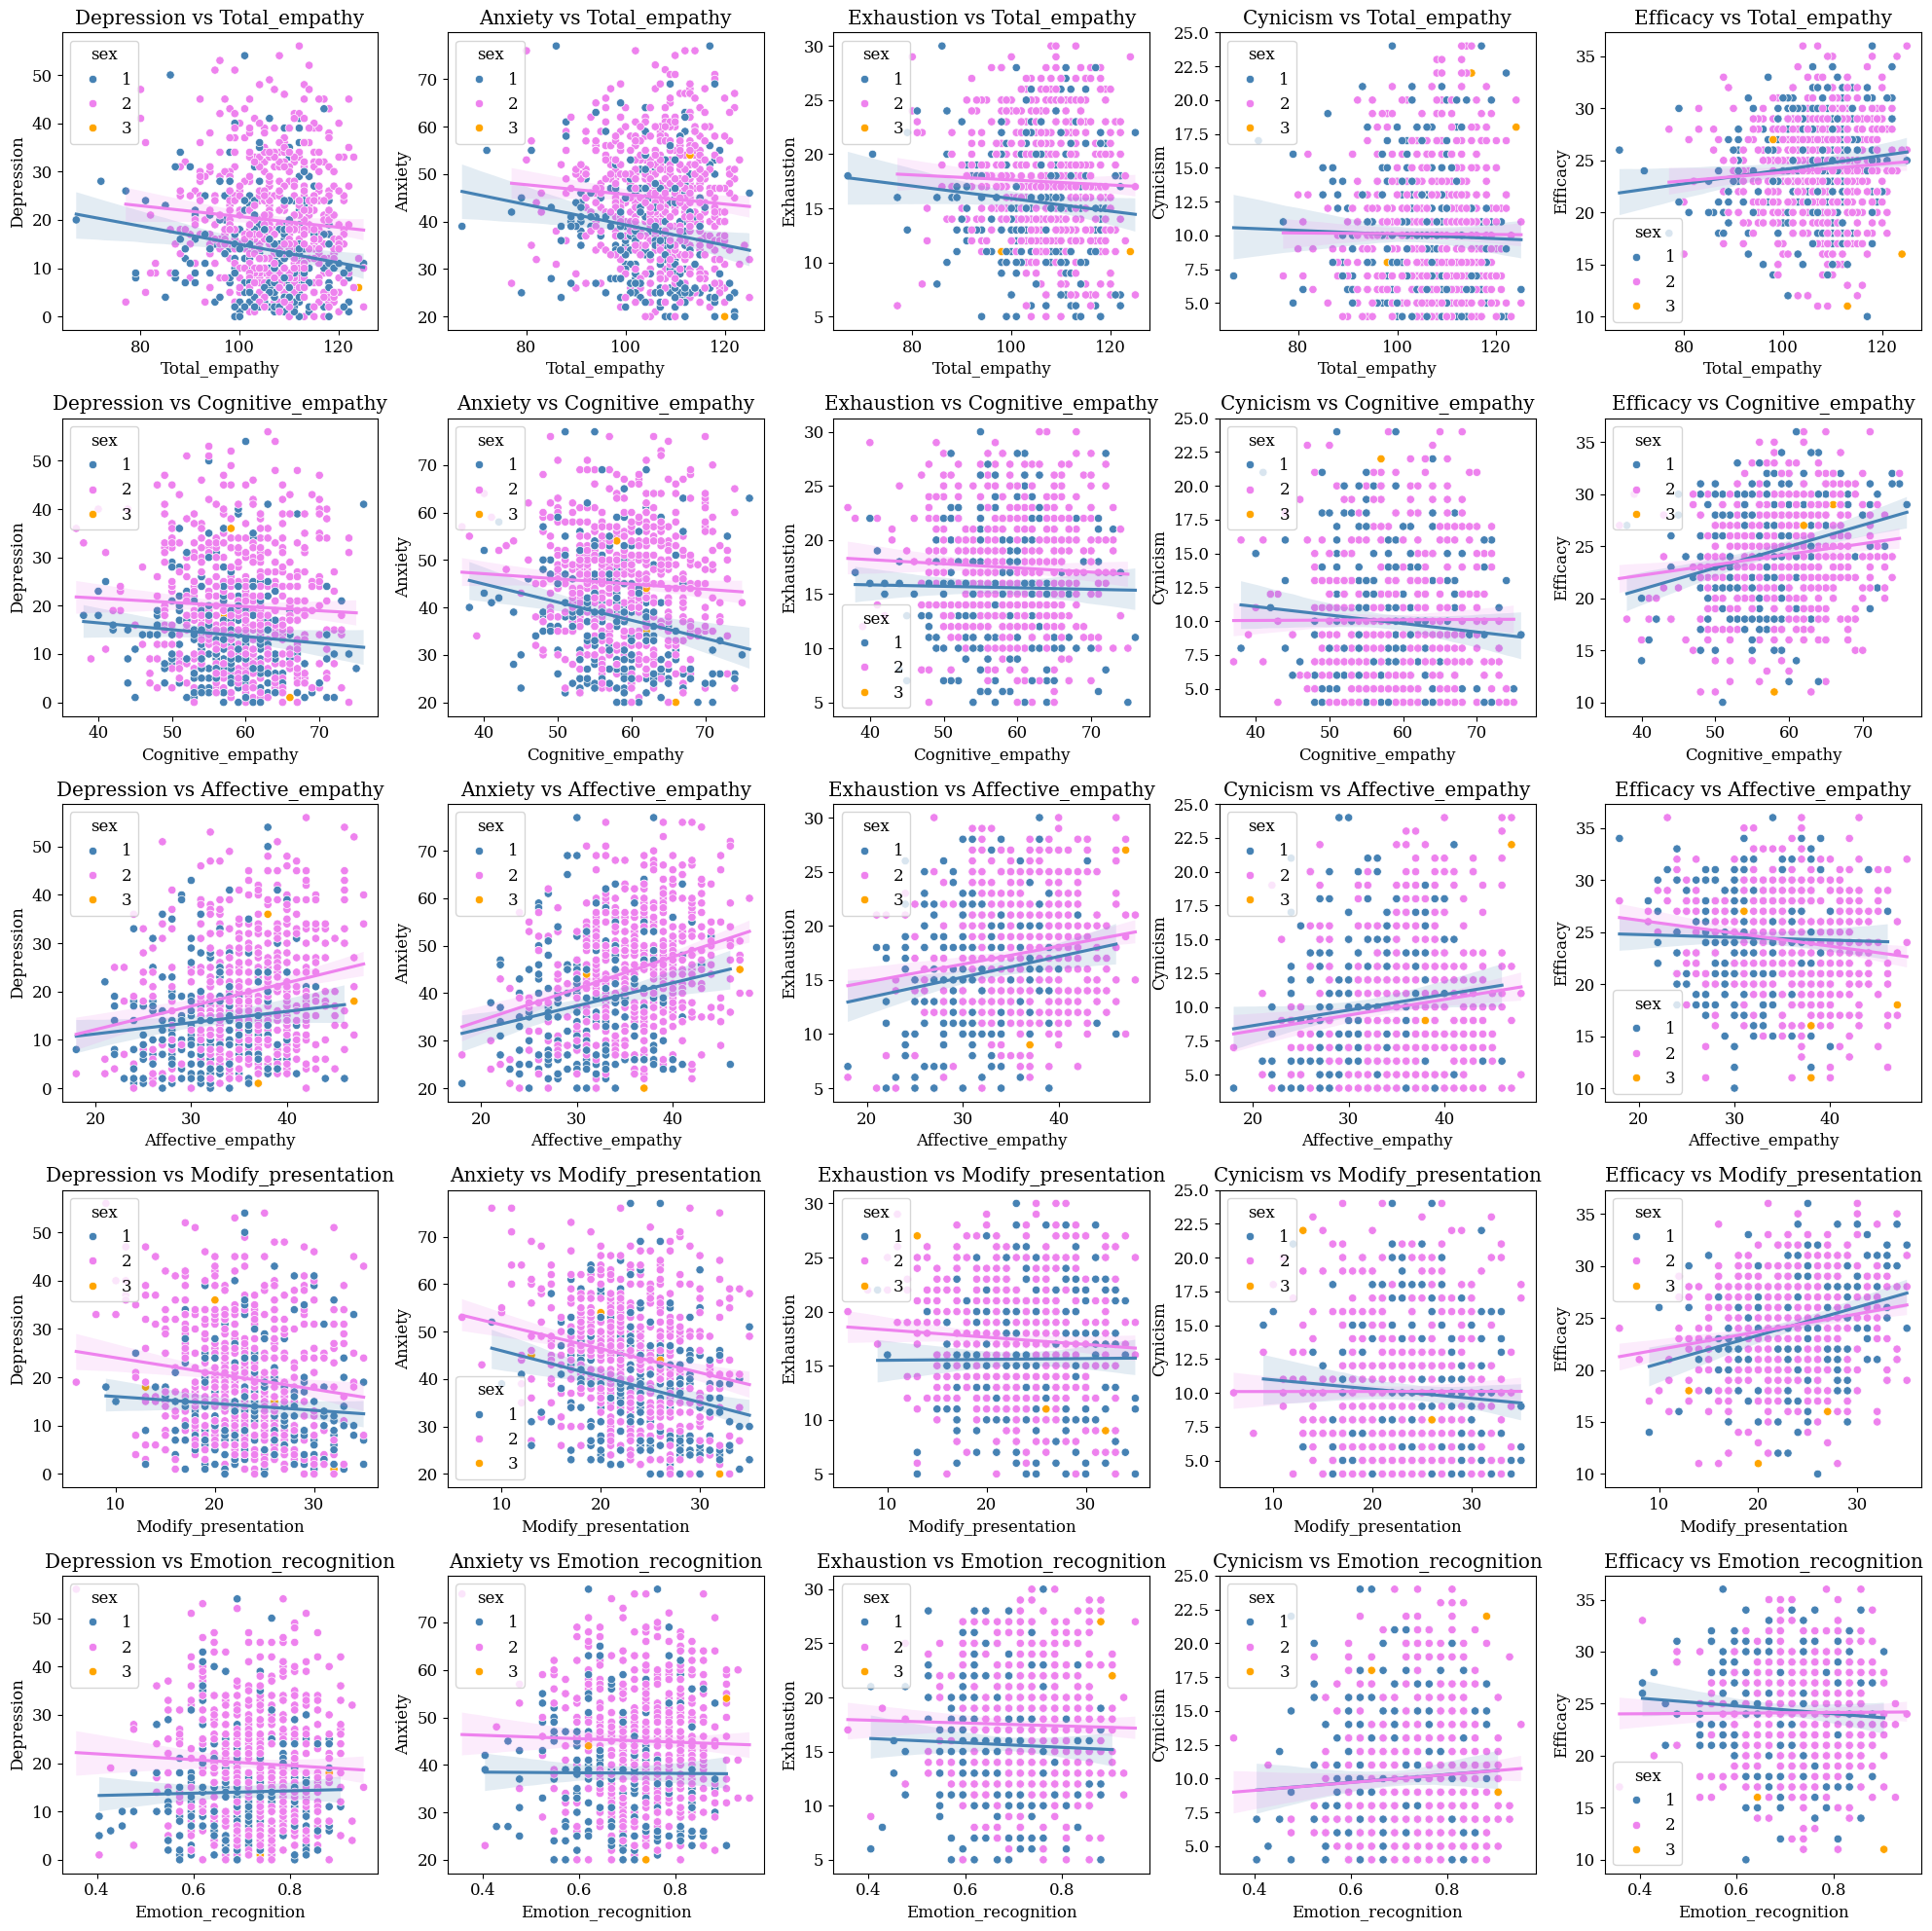

In [73]:
def plot_regression(ax, df, dependent_var,ind):
    sns.scatterplot(ax=ax, x=ind, y=dependent_var, hue='sex', data=df, palette={1: "steelblue", 2: "violet", 3: "orange"})
    sns.regplot(ax=ax, x=ind, y=dependent_var, data=df[df['sex'] == 1], scatter=False, color="steelblue")
    sns.regplot(ax=ax, x=ind, y=dependent_var, data=df[df['sex'] == 2], scatter=False, color="violet")
    ax.set_title(f'{dependent_var.capitalize()} vs {ind.capitalize()}')
    ax.set_xlabel(ind.capitalize())
    ax.set_ylabel(dependent_var.capitalize())

# Create a 2x5 grid for plots
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()


# Create regression plots in each subplot
for ax, (ind, var) in zip(axes, [(ind, var) for ind in empathy_indicators for var in dependent_vars]):
    plot_regression(ax, input, var, ind)

# Adjust layout
plt.tight_layout()
plt.show()

In [74]:
# Filter data for males
df_males = input[input['sex'] == 1]

# Filter data for females
df_females = input[input['sex'] == 2]

# Function to calculate slopes for each combination
def calculate_slopes(df, empathy_indicators, dependent_vars, sex_label):
    slopes = []
    for ind in empathy_indicators:
        for var in dependent_vars:
            slope, intercept, r_value, p_value, std_err = linregress(df[ind], df[var])
            slopes.append((ind, var, slope))
            print(f"Slope for {var} [Sex: {sex_label}, Empathy Indicator: {ind}] : {slope}")
    return slopes

# Calculate slopes for males
print("Calculating slopes for males...")
slopes_males = calculate_slopes(df_males, empathy_indicators, dependent_vars, 'Male')

# Calculate slopes for females
print("\nCalculating slopes for females...")
slopes_females = calculate_slopes(df_females, empathy_indicators, dependent_vars, 'Female')

# Convert results to DataFrame for easier comparison
comparison_df = pd.DataFrame(slopes_males, columns=['Empathy Indicator', 'Dependent Variable', 'Male Slope'])
comparison_df['Female Slope'] = [slope[2] for slope in slopes_females]

print("\nComparison of Slopes:")
print(comparison_df)

Calculating slopes for males...
Slope for depression [Sex: Male, Empathy Indicator: total_empathy] : -0.19005709588761519
Slope for anxiety [Sex: Male, Empathy Indicator: total_empathy] : -0.2135690156497238
Slope for exhaustion [Sex: Male, Empathy Indicator: total_empathy] : -0.05815990208577946
Slope for cynicism [Sex: Male, Empathy Indicator: total_empathy] : -0.015250562963211827
Slope for efficacy [Sex: Male, Empathy Indicator: total_empathy] : 0.06769278728857374
Slope for depression [Sex: Male, Empathy Indicator: cognitive_empathy] : -0.14035495920499988
Slope for anxiety [Sex: Male, Empathy Indicator: cognitive_empathy] : -0.38124422238299077
Slope for exhaustion [Sex: Male, Empathy Indicator: cognitive_empathy] : -0.01377051054038304
Slope for cynicism [Sex: Male, Empathy Indicator: cognitive_empathy] : -0.06258289624404653
Slope for efficacy [Sex: Male, Empathy Indicator: cognitive_empathy] : 0.20563669339442542
Slope for depression [Sex: Male, Empathy Indicator: affective_em

In [75]:
import pandas as pd
from scipy import stats  # For the t-test
from statsmodels.formula.api import ols  # For the OLS model

data=input
total_missing = data.isnull().sum().sum()
print(f'Total missing values: {total_missing}')

# Calculate the means for both genders
male_empathy = data[data['sex'] == 'male']['total_empathy']
female_empathy = data[data['sex'] == 'female']['total_empathy']

# Paired t-test over time (pre and post data)
t_stat, p_value = stats.ttest_rel(male_empathy, female_empathy)
print(f'Total Empathy T-test: t-stat={t_stat}, p-value={p_value}')

# Alternatively, for multiple years
model = ols('total_empathy ~ C(year) + C(sex) + C(year):C(sex)', data=data).fit()
print(model.summary())


Total missing values: 0
Total Empathy T-test: t-stat=nan, p-value=nan
                            OLS Regression Results                            
Dep. Variable:          total_empathy   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     11.11
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           4.61e-25
Time:                        18:49:31   Log-Likelihood:                -3104.2
No. Observations:                 886   AIC:                             6240.
Df Residuals:                     870   BIC:                             6317.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------